#   DSI-SG-13 Project 2 Regression Challenge
---
For this project we are tasked with making sales price predictions for house sales based on certain characteristics.


1. Review the material on the [DSI-US-6 Regression Challenge](https://www.kaggle.com/c/dsi-us-6-project-2-regression-challenge)
2. Review the [data description](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt).
---


---
## 1. Importing tools and data
---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV

from sklearn.model_selection import train_test_split, cross_val_score, KFold

from sklearn.metrics import r2_score , mean_squared_error
from sklearn.preprocessing import StandardScaler


%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

C:\Users\domin\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# reading given data sets
train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')

---
## 2. Inspecting the data
---

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [4]:
# note that there is no 'saleprice' column
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               879 non-null    int64  
 1   PID              879 non-null    int64  
 2   MS SubClass      879 non-null    int64  
 3   MS Zoning        879 non-null    object 
 4   Lot Frontage     719 non-null    float64
 5   Lot Area         879 non-null    int64  
 6   Street           879 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        879 non-null    object 
 9   Land Contour     879 non-null    object 
 10  Utilities        879 non-null    object 
 11  Lot Config       879 non-null    object 
 12  Land Slope       879 non-null    object 
 13  Neighborhood     879 non-null    object 
 14  Condition 1      879 non-null    object 
 15  Condition 2      879 non-null    object 
 16  Bldg Type        879 non-null    object 
 17  House Style     

---

In [5]:
# Map lower case function to all column names for my own ease 
train.columns = map(str.lower, train.columns)
test.columns = map(str.lower, test.columns)

In [6]:
#replace " " with "_" for all column names in python
train.columns = train.columns.str.replace(" ", "_")
test.columns = test.columns.str.replace(" ", "_")

In [7]:
# check if values in training 'saleprice' are negative
sum(n < 0 for n in train['saleprice'].values)

0

In [8]:
train.head()

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  lot_shape land_contour utilities lot_config land_slope neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3       Reg          Lvl    AllPub     Inside        Gtl       Timber   
4       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

  condition_1 condition_2 bldg_type house_style  overall_qual  overall_cond  \
0        RRAe        Norm      1Fam      2Story             6             8   
1        Norm        Norm      1Fam      2Story             7             5   
2        Norm        Norm      1Fam      1Story             5             7   
3        Norm        Norm      1Fam      2Story             5             5   
4        Norm        Norm      1Fam      1.5Fin             6             8   

   year_built  year_remod/add roof_style roof_matl exterior_1st exterior_2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   
2        1953            2007      Gable   CompShg      VinylSd      VinylSd   
3        2006            2007      Gable   CompShg      VinylSd      VinylSd   
4        1900            1993      Gable   CompShg      Wd Sdng      Plywood   

  mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation bsmt_qual  \
0      BrkFace         289.0         Gd         TA     CBlock        TA   
1      BrkFace         132.0         Gd         TA      PConc        Gd   
2         None           0.0         TA         Gd     CBlock        TA   
3         None           0.0         TA         TA      PConc        Gd   
4         None           0.0         TA         TA      PConc        Fa   

  bsmt_cond bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1 bsmtfin_type_2  \
0        TA            No            GLQ         533.0            Unf   
1        TA            No            GLQ         637.0            Unf   
2        TA            No            GLQ         731.0            Unf   
3        TA            No            Unf           0.0            Unf   
4        Gd            No            Unf           0.0            Unf   

   bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating heating_qc central_air  \
0           0.0        192.0          725.0    GasA         Ex           Y   
1           0.0        276.0          913.0    GasA         Ex           Y   
2           0.0        326.0         1057.0    GasA         TA           Y   
3           0.0        384.0          384.0    GasA         Gd           Y   
4           0.0        676.0          676.0    GasA         TA           Y   

  electrical  1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  gr_liv_area  \
0      SBrkr         725         754                0         1479   
1      SBrkr         913        1209                0         2122   
2      SBrkr        1057           0                0         1057   
3      SBrkr         744         700                0         1444   
4      SBrkr         831         614                0         1445   

   bsmt_full_bath  bsmt_half_bath  full_bath  half_bath  bedroom_abvgr  \
0             0.0             0.0          2          1              3   
1             1.0             0.0          2          1              4   
2             1.0             0.0          1          0              3   
3             0.0             0.0          2  

In [9]:
test.head()

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           NaN      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL           NaN      9500   Pave   

  alley lot_shape land_contour utilities lot_config land_slope neighborhood  \
0  Grvl       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
1   NaN       IR1          Lvl    AllPub     Inside        Gtl       Sawyer   
2   NaN       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
3   NaN       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
4   NaN       IR1          Lvl    AllPub     Inside        Gtl        NAmes   

  condition_1 condition_2 bldg_type house_style  overall_qual  overall_cond  \
0        Norm        Norm    2fmCon      2Story             6             8   
1        Norm        Norm    Duplex      1Story             5             4   
2        Norm        Norm      1Fam      2Story             7             5   
3        Norm        Norm      1Fam      1Story             5             6   
4        Norm        Norm      1Fam      1Story             6             5   

   year_built  year_remod/add roof_style roof_matl exterior_1st exterior_2nd  \
0        1910            1950      Gable   CompShg      AsbShng      AsbShng   
1        1977            1977      Gable   CompShg      Plywood      Plywood   
2        2006            2006      Gable   CompShg      VinylSd      VinylSd   
3        1923            2006      Gable   CompShg      Wd Sdng      Wd Sdng   
4        1963            1963      Gable   CompShg      Plywood      Plywood   

  mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation bsmt_qual  \
0         None           0.0         TA         Fa      Stone        Fa   
1         None           0.0         TA         TA     CBlock        Gd   
2         None           0.0         Gd         TA      PConc        Gd   
3         None           0.0         Gd         TA     CBlock        TA   
4      BrkFace         247.0         TA         TA     CBlock        Gd   

  bsmt_cond bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1 bsmtfin_type_2  \
0        TA            No            Unf             0            Unf   
1        TA            No            Unf             0            Unf   
2        Gd            Av            GLQ           554            Unf   
3        TA            No            Unf             0            Unf   
4        TA            No            BLQ           609            Unf   

   bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating heating_qc central_air  \
0             0         1020           1020    GasA         Gd           N   
1             0         1967           1967    GasA         TA           Y   
2             0          100            654    GasA         Ex           Y   
3             0          968            968    GasA         TA           Y   
4             0          785           1394    GasA         Gd           Y   

  electrical  1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  gr_liv_area  \
0      FuseP         908        1020                0         1928   
1      SBrkr        1967           0                0         1967   
2      SBrkr         664         832                0         1496   
3      SBrkr         968           0                0          968   
4      SBrkr        1394           0                0         1394   

   bsmt_full_bath  bsmt_half_bath  full_bath  half_bath  bedroom_abvgr  \
0               0               0          2          0              4   
1               0               0          2          0              6   
2               1               0          2          1              3   
3               0               0        

---
Referencing the Data Documentation, 
- it was observed that some columns with numerical (int/float) type values in them, were categorical. 
---


In [10]:
train['exter_qual'].value_counts()

TA    1247
Gd     697
Ex      81
Fa      26
Name: exter_qual, dtype: int64

In [11]:
train['exter_cond'].value_counts()

TA    1778
Gd     215
Fa      49
Ex       7
Po       2
Name: exter_cond, dtype: int64

In [12]:
train['kitchen_qual'].value_counts()

TA    1047
Gd     806
Ex     151
Fa      47
Name: kitchen_qual, dtype: int64

In [13]:
train['bsmt_qual'].value_counts()

TA    887
Gd    864
Ex    184
Fa     60
Po      1
Name: bsmt_qual, dtype: int64

In [14]:
train['heating_qc'].value_counts()

Ex    1065
TA     597
Gd     319
Fa      67
Po       3
Name: heating_qc, dtype: int64

In [15]:
train['fireplace_qu'].value_counts()

Gd    523
TA    407
Fa     59
Ex     31
Po     31
Name: fireplace_qu, dtype: int64

In [16]:
train['garage_qual'].value_counts()

TA    1832
Fa      82
Gd      18
Ex       3
Po       2
Name: garage_qual, dtype: int64

In [17]:
train['garage_cond'].value_counts()

TA    1868
Fa      47
Gd      12
Po       8
Ex       2
Name: garage_cond, dtype: int64

In [18]:
train['bsmt_cond'].value_counts()

TA    1834
Gd      89
Fa      65
Po       5
Ex       3
Name: bsmt_cond, dtype: int64

In [19]:
train['pool_qc'].value_counts()

Gd    4
Fa    2
TA    2
Ex    1
Name: pool_qc, dtype: int64

---
- Similarly, some categorical string data can numerical. 
---


In [20]:
train['ms_subclass'].value_counts()

20     770
60     394
50     198
120    132
30     101
70      90
160     88
80      86
90      75
190     46
85      28
75      16
45      11
180     11
40       4
150      1
Name: ms_subclass, dtype: int64

In [21]:
train['mo_sold'].value_counts()

6     352
7     303
5     257
4     208
3     168
8     167
10    123
9     109
2     104
11    103
1      79
12     78
Name: mo_sold, dtype: int64

In [22]:
train['yr_sold'].value_counts()

2007    498
2009    446
2006    438
2008    435
2010    234
Name: yr_sold, dtype: int64

---
## 3. Exploratory Data Analysis
---

### Plot heatmap of all Columns

In [23]:
# generating correlation heatmap for all features
train_corr=train.corr()

(39.5, -0.5)

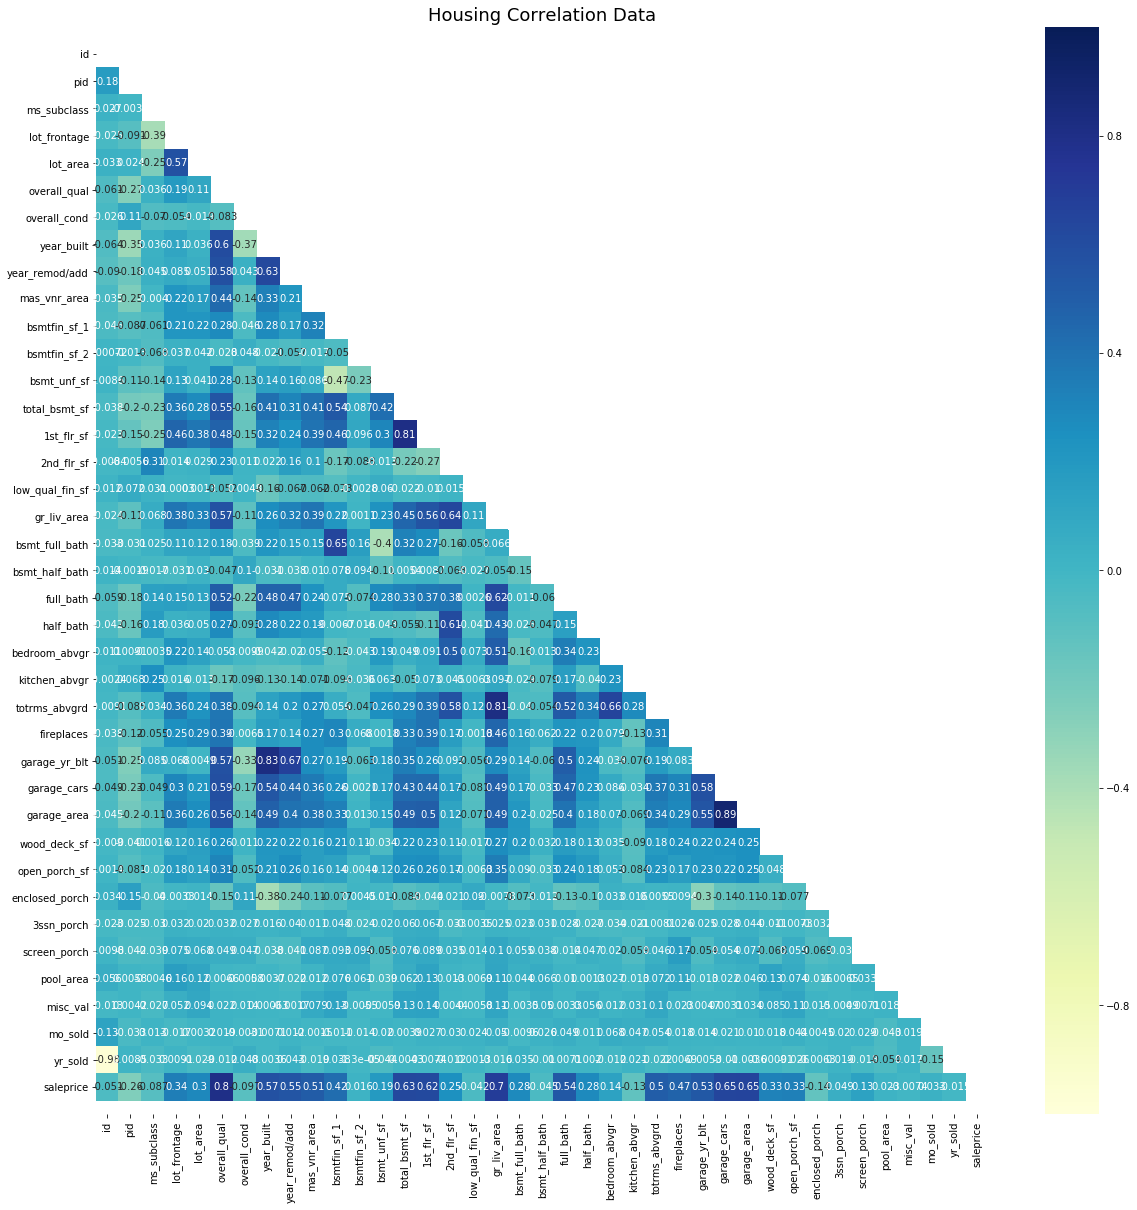

In [24]:
# fixing the figure size
plt.figure(figsize=(20,20))
plt.title('Housing Correlation Data', fontsize=18)

# create mask for upper traingle
mask = np.zeros_like(train_corr)
mask[np.triu_indices_from(mask)]=True

ax = sns.heatmap(train_corr, mask=mask, vmin = -1, vmax = 1, cmap="YlGnBu", center = 0, annot = True)

# prevent the top and bottom values from being cut off
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top -0.5)

### Print Correlation Values

In [25]:
train.corr()

id       pid  ms_subclass  lot_frontage  lot_area  \
id               1.000000  0.175793     0.026543     -0.024967  0.032872   
pid              0.175793  1.000000    -0.003632     -0.091291  0.024135   
ms_subclass      0.026543 -0.003632     1.000000     -0.389790 -0.245484   
lot_frontage    -0.024967 -0.091291    -0.389790      1.000000  0.574024   
lot_area         0.032872  0.024135    -0.245484      0.574024  1.000000   
overall_qual    -0.061483 -0.265863     0.035763      0.194808  0.105824   
overall_cond    -0.026096  0.106861    -0.070141     -0.054455 -0.019185   
year_built      -0.064444 -0.347039     0.035983      0.109504  0.036002   
year_remod/add  -0.090040 -0.176666     0.044836      0.085052  0.050771   
mas_vnr_area    -0.035493 -0.247959    -0.004047      0.218218  0.169379   
bsmtfin_sf_1    -0.045878 -0.086522    -0.060854      0.214178  0.215430   
bsmtfin_sf_2     0.000723 -0.013144    -0.068265      0.036740  0.041717   
bsmt_unf_sf      0.008555 -0.111281    -0.139911      0.127605  0.041184   
total_bsmt_sf   -0.038346 -0.203795    -0.226038      0.356584  0.277175   
1st_flr_sf      -0.022650 -0.145862    -0.246212      0.463900  0.381593   
2nd_flr_sf      -0.008388 -0.005598     0.305771      0.013700  0.029398   
low_qual_fin_sf  0.011719  0.072268     0.031091     -0.000300  0.001273   
gr_liv_area     -0.023881 -0.112936     0.068210      0.383856  0.327427   
bsmt_full_bath  -0.033385 -0.030554     0.025055      0.111441  0.116128   
bsmt_half_bath   0.014381 -0.001946    -0.017249     -0.030858  0.029980   
full_bath       -0.059086 -0.179370     0.142087      0.152812  0.125601   
half_bath       -0.042054 -0.163975     0.179404      0.035842  0.049995   
bedroom_abvgr    0.010605  0.009122    -0.003516      0.220414  0.139060   
kitchen_abvgr   -0.002400  0.068416     0.252111      0.015856 -0.013484   
totrms_abvgrd   -0.009092 -0.084999     0.034490      0.362704  0.238724   
fireplaces      -0.037560 -0.120710    -0.055118      0.253456  0.289467   
garage_yr_blt   -0.050730 -0.251257     0.084954      0.067865  0.004882   
garage_cars     -0.048666 -0.228368    -0.049148      0.297143  0.214954   
garage_area     -0.045201 -0.200891    -0.108228      0.358457  0.263296   
wood_deck_sf    -0.009045 -0.041221     0.001622      0.115180  0.155623   
open_porch_sf    0.001382 -0.081129    -0.020289      0.184958  0.140864   
enclosed_porch   0.033747  0.150179    -0.039842     -0.003302  0.014139   
3ssn_porch      -0.022791 -0.024679    -0.030088      0.031855  0.019553   
screen_porch     0.009758 -0.042030    -0.038819      0.074819  0.067714   
pool_area        0.055696  0.005825    -0.004585      0.156575  0.115102   
misc_val        -0.012683  0.004223    -0.027485      0.051676  0.093922   
mo_sold          0.127723 -0.032735     0.013027     -0.017389  0.003197   
yr_sold         -0.975747  0.008476    -0.032870      0.009112 -0.029454   
saleprice       -0.051398 -0.255052    -0.087335      0.341842  0.296566   

                 overall_qual  overall_cond  year_built  year_remod/add  \
id                  -0.061483     -0.026096   -0.064444       -0.090040   
pid                 -0.265863      0.106861   -0.347039       -0.176666   
ms_subclass          0.035763     -0.070141    0.035983        0.044836   
lot_frontage         0.194808     -0.054455    0.109504        0.085052   
lot_area             0.105824     -0.019185    0.036002        0.050771   
overall_qual         1.000000     -0.082770    0.602964        0.584654   
overall_cond        -0.082770      1.000000   -0.370988        0.042614   
year_built           0.602964     -0.370988    1.000000        0.629116   
year_remod/add       0.584654      0.042614    0.629116        1.000000   
mas_vnr_area         0.438685     -0.135878    0.329741        0.211443   
bsmtfin_sf_1         0.278742     -0.045768    0.275440        0.166680   
bsmtfin_sf_2        -0.028199      0.047810   -0.021031       -0.057163   
bsmt_un

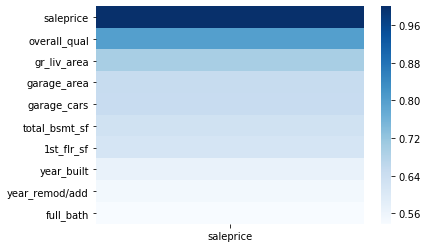

In [26]:
# check for top 10 features with high correlation to 'saleprice'
top_corr = np.abs(train_corr[['saleprice']]).sort_values('saleprice', ascending=False)
sns.heatmap(top_corr.head(10), cmap='Blues')

### Plot Histograms of the Numeric Columns

In [27]:
# dataframe with numeric columns including 'saleprice'
train_num_saleprice = train._get_numeric_data()

In [28]:
print(len(train_num_saleprice.columns))

39


In [29]:
# Create list of numeric columns
numeric_columns = train_num_saleprice.select_dtypes(include=[np.number]).columns.tolist()
print(numeric_columns)

['id', 'pid', 'ms_subclass', 'lot_frontage', 'lot_area', 'overall_qual', 'overall_cond', 'year_built', 'year_remod/add', 'mas_vnr_area', 'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces', 'garage_yr_blt', 'garage_cars', 'garage_area', 'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch', 'pool_area', 'misc_val', 'mo_sold', 'yr_sold', 'saleprice']


In [30]:
def plot_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(20,100))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(ax=ax, alpha=0.8)
        plt.axvline(df[var_name].mean(), color='r', linestyle='dashed', linewidth=2, label='Mean')
        plt.axvline(df[var_name].median(), color='orange', linestyle='dashed', linewidth=2, label='Median')
        ax.set_title(var_name+" Distribution")
        plt.legend()
    fig.tight_layout()
    plt.show()

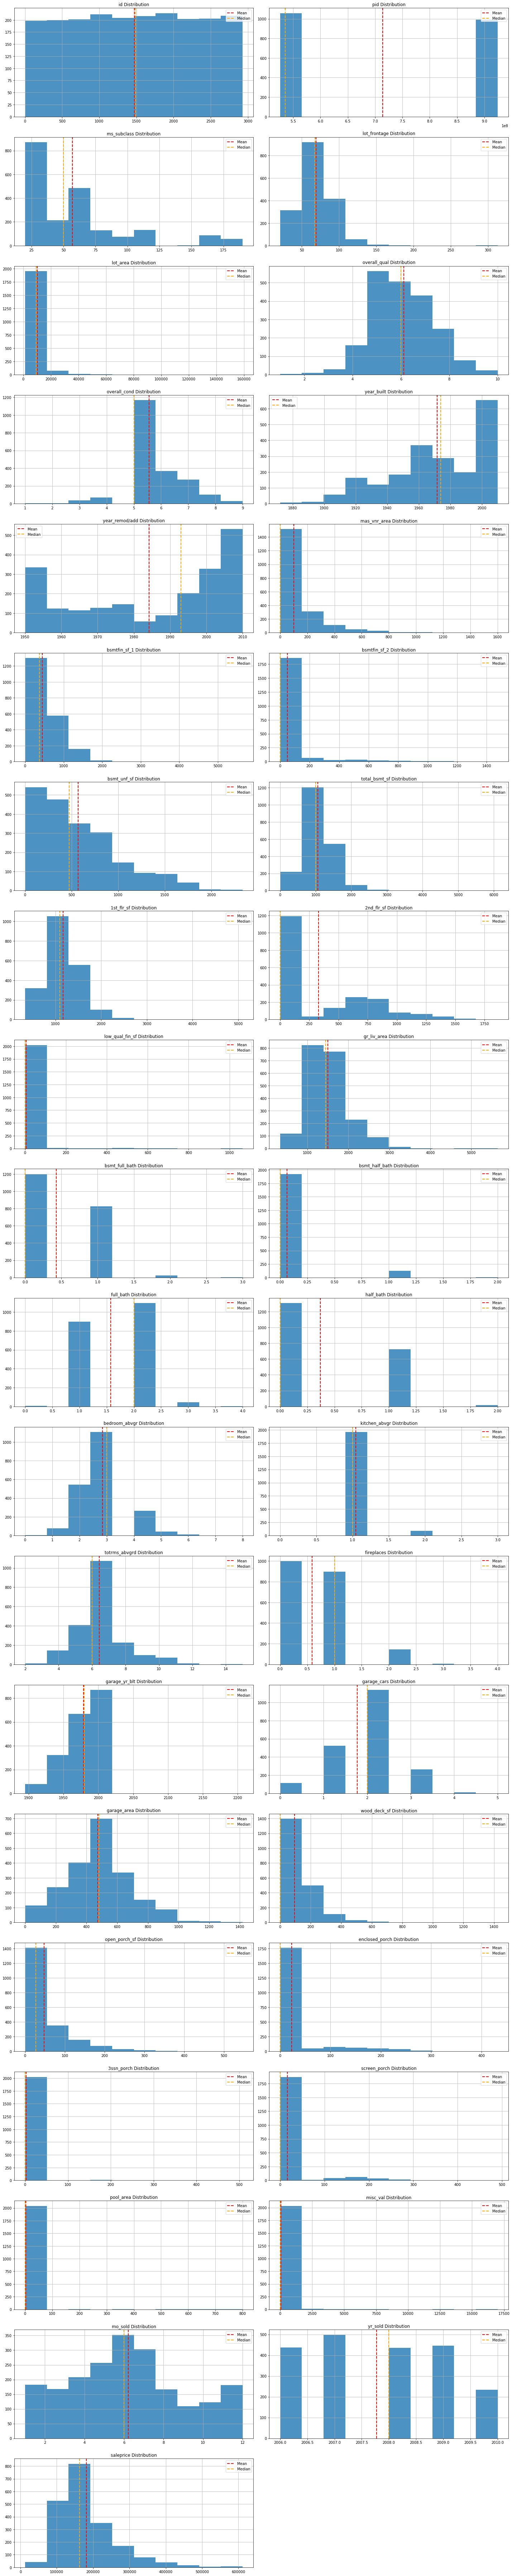

In [31]:
plot_histograms(train_num_saleprice, numeric_columns, int(len(numeric_columns)/2)+1, 2)

### Draw Scatter Plots of the Numeric Columns

In [32]:
def plot_scatters(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(15,60))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        sns.regplot(x=var_name,y='saleprice',data=df,fit_reg=False, scatter_kws={'alpha':0.2})
        ax.set_title(var_name +" vs. Sale Price")
    fig.tight_layout()
    plt.show()

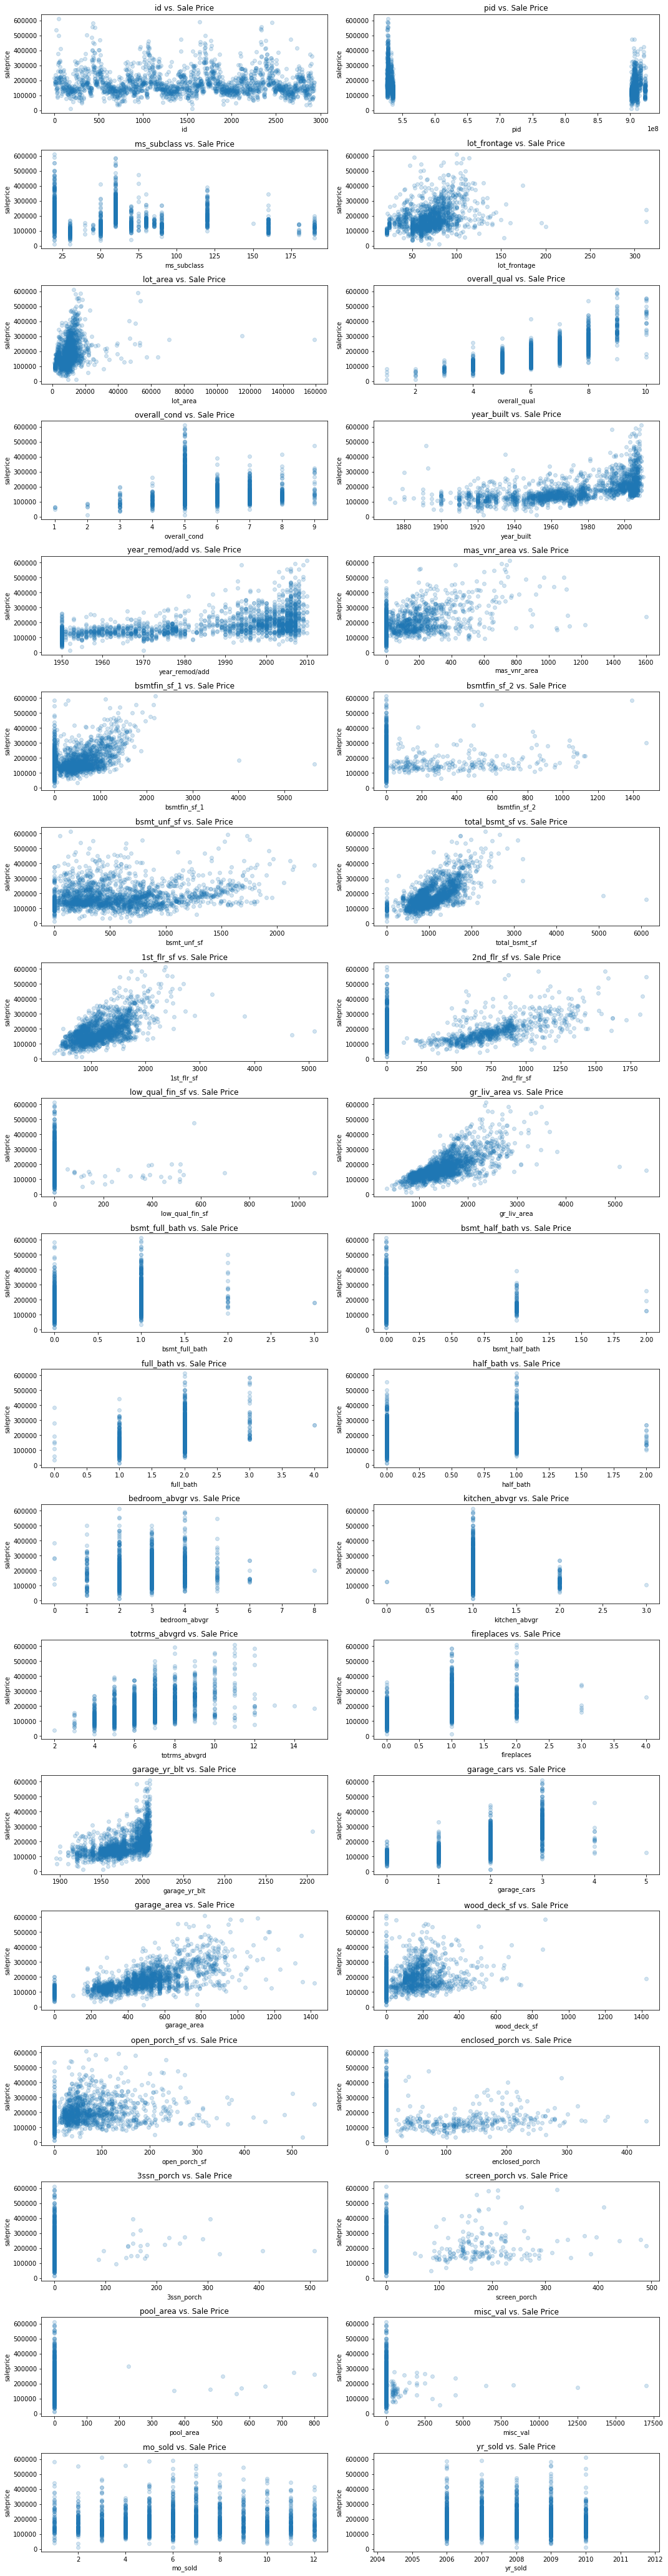

In [33]:
plot_scatters(train_num_saleprice, numeric_columns[:-1], int(len(numeric_columns[:-1])/2)+1, 2)

---
Summary of figures (Numerical Data)

- Use of a heatmap enabled me to visually scan the data for visual color-sensing of all features correlation with each other. 
- Many features were observed to have close to zero values of correlations with other features.
- It was noted that there were several white boxes that corresponded to null data in the respective features.
- Strong correlations exists between various features, but 'saleprice' was displayed the strongest correlation to many features.
- Top 10  features with the strongest correlation to 'saleprice' yielded possibly collinear results; garage area and basement area maybe overlapping features. 
- residentials with 2 floors were not as common as those with just 1, but for those that did had a relatively large one.
- the middle of the year was the most common time that houses were sold/bought.

- the outliers seens in the 1st floor square footage vs sales price were addressed in the data documentation as true outliers and will be left in the data
- the outlier in the garage year built vs sales price will be removed

---

### Draw Bar Plots of the Categorical Columns 

In [34]:
# remove all numeric data from train, less saleprice
train_num_copy1 = train._get_numeric_data().drop(['saleprice'], axis=1)  

In [35]:
# dataframe of categorical features with 'saleprice'
train_cat_list_saleprice = [x for x in train.columns if (x not in train_num_copy1.columns)]
train_cat_saleprice = train[train_cat_list_saleprice]

In [36]:
len(train_cat_saleprice.columns)

43

In [37]:
# Create list of categorical columns
cat_columns = train_cat_saleprice.columns.tolist()
print(cat_columns)

['ms_zoning', 'street', 'alley', 'lot_shape', 'land_contour', 'utilities', 'lot_config', 'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type', 'house_style', 'roof_style', 'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2', 'heating', 'heating_qc', 'central_air', 'electrical', 'kitchen_qual', 'functional', 'fireplace_qu', 'garage_type', 'garage_finish', 'garage_qual', 'garage_cond', 'paved_drive', 'pool_qc', 'fence', 'misc_feature', 'sale_type', 'saleprice']


In [38]:
# Draw bar plots of categorical data
def draw_bars(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(20,100))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        sns.barplot(x=var_name,y='saleprice',data=df,ci='sd')
        plt.sca(ax)
        plt.xticks(rotation=70)
        ax.set_title(var_name)
    fig.tight_layout()
    plt.show()

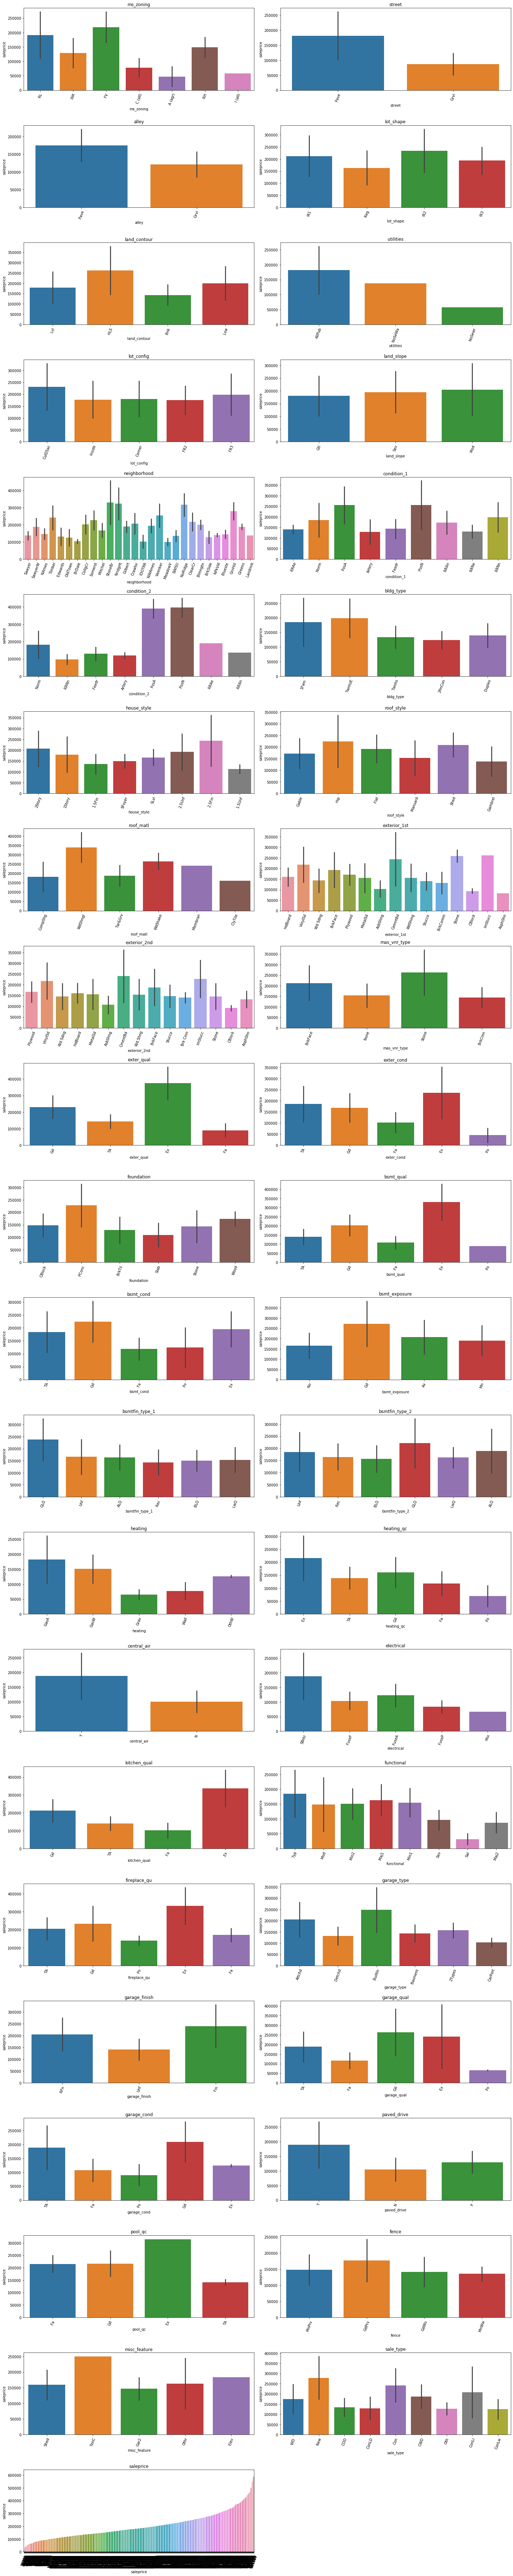

In [39]:
draw_bars(train_cat_saleprice, cat_columns, int(len(cat_columns)/2)+1, 2)

---
**Summary of figures (Categorical Data)**

- Though the graphs are not drawn in relation to their quantities, barplots allowed for a visual scan between data of categorical features within a column in correlation with sales price.
- Amongst MS Zoning, the general zoning classification, floating village residentials observed the highest sale price, despite Iowa being a contral US state with few water bodies.
- It was observed that certain neighbourhoods also commanded a higher salesprice.

---

---
**Summary of all Raw Data**

- Given the data at hand and the correspending features gathered, a prediction model can be generated, and there was no requirement to exclude any features outside of PID and ID, which were unique to the residence as an identification form. 
- The null data observed will be filled accordingly.
---

---
## 4. Pre-processing
---

In [40]:
# drop 'Id' and 'PID' as they are as unique as indices for each specific house (row) and are not features
train = train.drop(['id', 'pid'], axis=1)
test = test.drop(['id', 'pid'], axis=1)

In [41]:
train['ms_zoning'].value_counts()

RL         1598
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: ms_zoning, dtype: int64

In [42]:
train['ms_subclass'].value_counts()

20     770
60     394
50     198
120    132
30     101
70      90
160     88
80      86
90      75
190     46
85      28
75      16
45      11
180     11
40       4
150      1
Name: ms_subclass, dtype: int64

In [43]:
train['neighborhood'] = train['neighborhood'].str.lower()

In [44]:
train['neighborhood'].value_counts()

names      310
collgcr    180
oldtown    163
edwards    143
somerst    130
nridght    122
gilbert    116
sawyer     111
sawyerw     87
nwames      87
mitchel     82
brkside     76
crawfor     71
idotrr      69
timber      48
noridge     48
stonebr     38
swisu       32
clearcr     27
meadowv     24
blmngtn     22
brdale      19
veenker     17
npkvill     17
blueste      6
greens       3
grnhill      2
landmrk      1
Name: neighborhood, dtype: int64

---
**Referencing the data documentaion,**
- 'ms_zoning' identifies the general zoning classification of the sale. 
- 'ms_subclass' identifies the type of dwelling involved in the sale.
- 'neighborhood' refers to the physical locations within Ames city limits

The traditional connotations of 'location, location, location' can be assumed into these and its relation to sales pricing. 

---

---
### a. Dealing with Null Data
---
- Columns with more than 30% null values will be identified and possibly dropped to prevent accessing tempering when introducing randowm normalised valued later (most columns have less than 20% null values). However, should cross refencing with other columns and data documentation suggests that the null value is significant (e.g. null value for pool_qc is representative of the residence having no pool), the data will be changed to str'NA'


- Of note, the kaggle submission requires for the full 879 entries in that data set. Hence, no rows in the test data set can be dropped.
---

In [45]:
# check percentage of null values by column in train
train.isnull().mean().sort_values(ascending=False)

pool_qc            0.995612
misc_feature       0.968308
alley              0.931741
fence              0.804973
fireplace_qu       0.487567
lot_frontage       0.160897
garage_qual        0.055583
garage_cond        0.055583
garage_yr_blt      0.055583
garage_finish      0.055583
garage_type        0.055095
bsmt_exposure      0.028279
bsmtfin_type_2     0.027304
bsmt_qual          0.026816
bsmtfin_type_1     0.026816
bsmt_cond          0.026816
mas_vnr_type       0.010726
mas_vnr_area       0.010726
bsmt_half_bath     0.000975
bsmt_full_bath     0.000975
bsmt_unf_sf        0.000488
total_bsmt_sf      0.000488
bsmtfin_sf_1       0.000488
bsmtfin_sf_2       0.000488
garage_cars        0.000488
garage_area        0.000488
exterior_2nd       0.000000
exterior_1st       0.000000
roof_matl          0.000000
roof_style         0.000000
year_remod/add     0.000000
exter_qual         0.000000
saleprice          0.000000
year_built         0.000000
lot_config         0.000000
ms_zoning          0

In [46]:
# check percentage of null values by column in test
test.isnull().mean().sort_values(ascending=False)

pool_qc            0.995449
misc_feature       0.953356
alley              0.934016
fence              0.804323
fireplace_qu       0.480091
lot_frontage       0.182025
garage_cond        0.051195
garage_qual        0.051195
garage_yr_blt      0.051195
garage_finish      0.051195
garage_type        0.050057
bsmtfin_type_1     0.028441
bsmtfin_type_2     0.028441
bsmt_qual          0.028441
bsmt_cond          0.028441
bsmt_exposure      0.028441
electrical         0.001138
mas_vnr_area       0.001138
mas_vnr_type       0.001138
year_built         0.000000
exter_qual         0.000000
exter_cond         0.000000
foundation         0.000000
exterior_2nd       0.000000
exterior_1st       0.000000
roof_matl          0.000000
roof_style         0.000000
year_remod/add     0.000000
sale_type          0.000000
overall_cond       0.000000
overall_qual       0.000000
house_style        0.000000
bldg_type          0.000000
condition_2        0.000000
neighborhood       0.000000
land_slope         0

In [47]:
# list of columns with null values in train
train_null_col_list = train.columns[train.isnull().any()].tolist()
train_null_col_list

['lot_frontage',
 'alley',
 'mas_vnr_type',
 'mas_vnr_area',
 'bsmt_qual',
 'bsmt_cond',
 'bsmt_exposure',
 'bsmtfin_type_1',
 'bsmtfin_sf_1',
 'bsmtfin_type_2',
 'bsmtfin_sf_2',
 'bsmt_unf_sf',
 'total_bsmt_sf',
 'bsmt_full_bath',
 'bsmt_half_bath',
 'fireplace_qu',
 'garage_type',
 'garage_yr_blt',
 'garage_finish',
 'garage_cars',
 'garage_area',
 'garage_qual',
 'garage_cond',
 'pool_qc',
 'fence',
 'misc_feature']

In [48]:
# list of sum of null values of each column in train
train_null_list = train[train_null_col_list].isnull().sum()
train_null_list.sort_values(ascending=False)

pool_qc           2042
misc_feature      1986
alley             1911
fence             1651
fireplace_qu      1000
lot_frontage       330
garage_yr_blt      114
garage_cond        114
garage_qual        114
garage_finish      114
garage_type        113
bsmt_exposure       58
bsmtfin_type_2      56
bsmt_cond           55
bsmt_qual           55
bsmtfin_type_1      55
mas_vnr_type        22
mas_vnr_area        22
bsmt_half_bath       2
bsmt_full_bath       2
garage_cars          1
bsmtfin_sf_1         1
bsmtfin_sf_2         1
bsmt_unf_sf          1
garage_area          1
total_bsmt_sf        1
dtype: int64

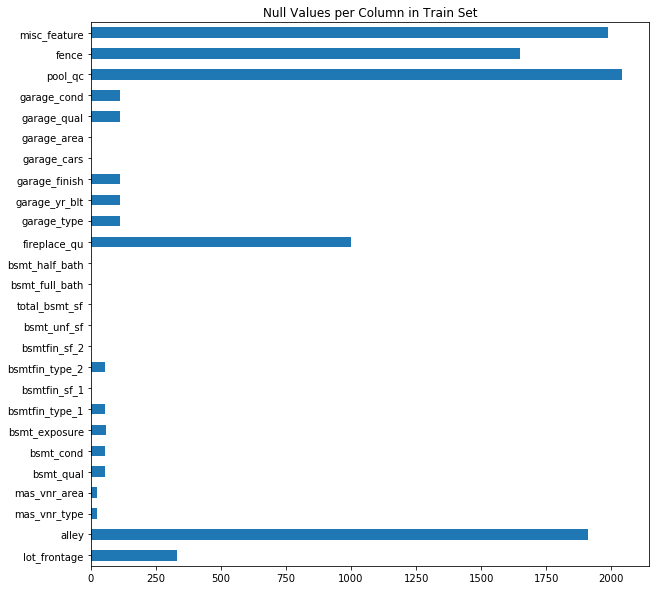

In [49]:
# fixing the figure size
plt.figure(figsize=(10,10))

# bar plot for columns with null values
train_null_list.plot(kind='barh', title='Null Values per Column in Train Set')
plt.show()

In [50]:
# list of columns with null values in test
test_null_col_list = test.columns[test.isnull().any()].tolist()
test_null_col_list

['lot_frontage',
 'alley',
 'mas_vnr_type',
 'mas_vnr_area',
 'bsmt_qual',
 'bsmt_cond',
 'bsmt_exposure',
 'bsmtfin_type_1',
 'bsmtfin_type_2',
 'electrical',
 'fireplace_qu',
 'garage_type',
 'garage_yr_blt',
 'garage_finish',
 'garage_qual',
 'garage_cond',
 'pool_qc',
 'fence',
 'misc_feature']

In [51]:
# list of sum of null values of each column in test
test_null_list = test[test_null_col_list].isnull().sum()
test_null_list.sort_values(ascending=False)

pool_qc           875
misc_feature      838
alley             821
fence             707
fireplace_qu      422
lot_frontage      160
garage_yr_blt      45
garage_finish      45
garage_qual        45
garage_cond        45
garage_type        44
bsmtfin_type_2     25
bsmtfin_type_1     25
bsmt_exposure      25
bsmt_cond          25
bsmt_qual          25
mas_vnr_area        1
mas_vnr_type        1
electrical          1
dtype: int64

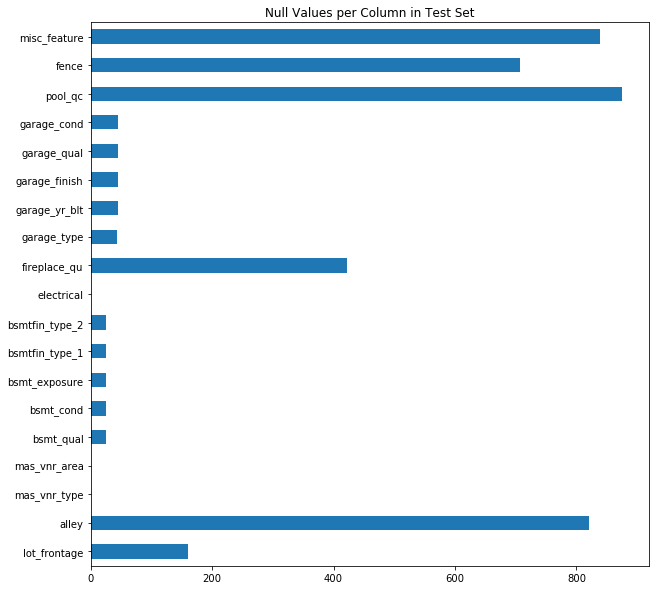

In [52]:
# fixing the figure size
plt.figure(figsize=(10,10))

# bar plot for columns with null values
test_null_list.plot(kind='barh', title='Null Values per Column in Test Set')
plt.show()

---
It was observed that both test and train column have the same columns with more than 30% null values.

**train columns with more than 30% null values:**

|              |          |
|--------------|----------|
| pool_qc      | 0.995612 |
| misc_feature | 0.968308 |
| alley        | 0.931741 |
| fence        | 0.804973 |
| fireplace_qu | 0.487567 |


**test columns with more than 30% null values:**

|              |          |
|--------------|----------|
| pool_qc      | 0.995449 |
| misc_feature | 0.953356 |
| alley        | 0.934016 |
| fence        | 0.804323 |
| fireplace_qu | 0.480091 |

---

Additionally, the test set has fewer null columns than the train. The only column containing null value(s) in the test set but not on the train is 'electrical'.

---

In [53]:
train[train['garage_cars'].isnull()]

ms_subclass ms_zoning  lot_frontage  lot_area street alley lot_shape  \
1712           70        RM          50.0      9060   Pave   NaN       Reg   

     land_contour utilities lot_config land_slope neighborhood condition_1  \
1712          Lvl    AllPub     Inside        Gtl       idotrr        Norm   

     condition_2 bldg_type house_style  overall_qual  overall_cond  \
1712        Norm      1Fam      2Story             5             6   

      year_built  year_remod/add roof_style roof_matl exterior_1st  \
1712        1923            1999      Gable   CompShg      Wd Sdng   

     exterior_2nd mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation  \
1712      Plywood         None           0.0         TA         TA     BrkTil   

     bsmt_qual bsmt_cond bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1  \
1712        Gd        TA            No            ALQ         548.0   

     bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating  \
1712            Unf           0.0        311.0          859.0    GasA   

     heating_qc central_air electrical  1st_flr_sf  2nd_flr_sf  \
1712         Ex           Y      SBrkr         942         886   

      low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  \
1712                0         1828             0.0             0.0          2   

      half_bath  bedroom_abvgr  kitchen_abvgr kitchen_qual  totrms_abvgrd  \
1712          0              3              1           Gd              6   

     functional  fireplaces fireplace_qu garage_type  garage_yr_blt  \
1712        Typ           0          NaN      Detchd            NaN   

     garage_finish  garage_cars  garage_area garage_qual garage_cond  \
1712           NaN          NaN          NaN         NaN         NaN   

     paved_drive  wood_deck_sf  open_porch_sf  enclosed_porch  3ssn_porch  \
1712           Y           174              0             212           0   

      screen_porch  pool_area pool_qc  fence misc_feature  misc_val  mo_sold  \
1712             0          0     NaN  MnPrv          NaN         0        3   

      yr_sold sale_type  saleprice  
1712     2007       WD      150909

##### Sorting out 'mas_vnr_type' and 'mas_vnr_area' columns for test and train

In [54]:
train[train['mas_vnr_area'].isnull()]

ms_subclass ms_zoning  lot_frontage  lot_area street alley lot_shape  \
22             60        RL         103.0     12867   Pave   NaN       IR1   
41             20        RL         107.0     13891   Pave   NaN       Reg   
86             20        RL          67.0     10083   Pave   NaN       Reg   
212            20        FV          90.0      7993   Pave   NaN       IR1   
276            20        RL          75.0      8050   Pave   NaN       Reg   
338            60        FV         112.0     12217   Pave   NaN       IR1   
431            60        RL          75.0      9473   Pave   NaN       Reg   
451            20        RL          87.0     10037   Pave   NaN       Reg   
591           120        FV          35.0      4274   Pave  Pave       IR1   
844           120        FV          30.0      5330   Pave  Pave       IR2   
913            20        RL           NaN     32668   Pave   NaN       IR1   
939            20        FV          95.0     11639   Pave   NaN       Reg   
1025           20        RL          85.0      9965   Pave   NaN       Reg   
1244           60        RL           NaN     12891   Pave   NaN       IR1   
1306           80        RL           NaN     11950   Pave   NaN       IR1   
1430           60        FV           NaN      7500   Pave   NaN       Reg   
1434           60        FV          65.0      8125   Pave   NaN       Reg   
1606           60        RL           NaN      7750   Pave   NaN       Reg   
1699           20        RL          68.0      8298   Pave   NaN       IR1   
1815           20        RL          49.0     15218   Pave   NaN       IR1   
1820           60        RL          59.0     15810   Pave   NaN       IR1   
1941           60        RL           NaN      7851   Pave   NaN       Reg   

     land_contour utilities lot_config land_slope neighborhood condition_1  \
22            Lvl    AllPub     Corner        Gtl      nridght        Norm   
41            Lvl    AllPub     Inside        Gtl      nridght        Norm   
86            Lvl    AllPub     Inside        Gtl      sawyerw        Norm   
212           Lvl    AllPub     Inside        Gtl      somerst        Norm   
276           Lvl    AllPub     Inside        Gtl      edwards        Norm   
338           Lvl    AllPub     Inside        Gtl      somerst        Norm   
431           Lvl    AllPub     Inside        Gtl      collgcr        Norm   
451           Lvl    AllPub     Corner        Gtl      somerst       Feedr   
591           Lvl    AllPub     Inside        Gtl      somerst        Norm   
844           Lvl    AllPub     Inside        Gtl      somerst        Norm   
913           Lvl    AllPub    CulDSac        Gtl      crawfor        Norm   
939           Lvl    AllPub     Corner        Gtl      somerst        Norm   
1025          Lvl    AllPub        FR2        Gtl      somerst       Feedr   
1244          Lvl    AllPub     Corner        Gtl      gilbert        Norm   
1306          Lvl    AllPub     Corner        Gtl      gilbert        Norm   
1430          Lvl    AllPub     Inside        Gtl      somerst        Norm   
1434          Lvl    AllPub     Inside        Gtl      somerst        Norm   
1606          Lvl    AllPub     Inside        Gtl      gilbert        RRAn   
1699          HLS    AllPub     Inside        Gtl       timber        Norm   
1815          Lvl    AllPub    CulDSac        Gtl      somerst        RRAn   
1820          Lvl    AllPub     Inside        Gtl      gilbert        RRAn   
1941          Lvl    AllPub     Inside        Gtl      gilbert        Norm   

     condition_2 bldg_type house_style  overall_qual  overall_cond  \
22          Norm      1Fam      2Story             8             5   
41          Norm      1Fam      1Story            10             5   
86          Norm      1Fam      1Story             7             5   
212         Norm      1Fam      1Story             7             5   
276         Norm      1Fam      1Story             6             5

In [55]:
train[train['mas_vnr_type'].isnull()]

ms_subclass ms_zoning  lot_frontage  lot_area street alley lot_shape  \
22             60        RL         103.0     12867   Pave   NaN       IR1   
41             20        RL         107.0     13891   Pave   NaN       Reg   
86             20        RL          67.0     10083   Pave   NaN       Reg   
212            20        FV          90.0      7993   Pave   NaN       IR1   
276            20        RL          75.0      8050   Pave   NaN       Reg   
338            60        FV         112.0     12217   Pave   NaN       IR1   
431            60        RL          75.0      9473   Pave   NaN       Reg   
451            20        RL          87.0     10037   Pave   NaN       Reg   
591           120        FV          35.0      4274   Pave  Pave       IR1   
844           120        FV          30.0      5330   Pave  Pave       IR2   
913            20        RL           NaN     32668   Pave   NaN       IR1   
939            20        FV          95.0     11639   Pave   NaN       Reg   
1025           20        RL          85.0      9965   Pave   NaN       Reg   
1244           60        RL           NaN     12891   Pave   NaN       IR1   
1306           80        RL           NaN     11950   Pave   NaN       IR1   
1430           60        FV           NaN      7500   Pave   NaN       Reg   
1434           60        FV          65.0      8125   Pave   NaN       Reg   
1606           60        RL           NaN      7750   Pave   NaN       Reg   
1699           20        RL          68.0      8298   Pave   NaN       IR1   
1815           20        RL          49.0     15218   Pave   NaN       IR1   
1820           60        RL          59.0     15810   Pave   NaN       IR1   
1941           60        RL           NaN      7851   Pave   NaN       Reg   

     land_contour utilities lot_config land_slope neighborhood condition_1  \
22            Lvl    AllPub     Corner        Gtl      nridght        Norm   
41            Lvl    AllPub     Inside        Gtl      nridght        Norm   
86            Lvl    AllPub     Inside        Gtl      sawyerw        Norm   
212           Lvl    AllPub     Inside        Gtl      somerst        Norm   
276           Lvl    AllPub     Inside        Gtl      edwards        Norm   
338           Lvl    AllPub     Inside        Gtl      somerst        Norm   
431           Lvl    AllPub     Inside        Gtl      collgcr        Norm   
451           Lvl    AllPub     Corner        Gtl      somerst       Feedr   
591           Lvl    AllPub     Inside        Gtl      somerst        Norm   
844           Lvl    AllPub     Inside        Gtl      somerst        Norm   
913           Lvl    AllPub    CulDSac        Gtl      crawfor        Norm   
939           Lvl    AllPub     Corner        Gtl      somerst        Norm   
1025          Lvl    AllPub        FR2        Gtl      somerst       Feedr   
1244          Lvl    AllPub     Corner        Gtl      gilbert        Norm   
1306          Lvl    AllPub     Corner        Gtl      gilbert        Norm   
1430          Lvl    AllPub     Inside        Gtl      somerst        Norm   
1434          Lvl    AllPub     Inside        Gtl      somerst        Norm   
1606          Lvl    AllPub     Inside        Gtl      gilbert        RRAn   
1699          HLS    AllPub     Inside        Gtl       timber        Norm   
1815          Lvl    AllPub    CulDSac        Gtl      somerst        RRAn   
1820          Lvl    AllPub     Inside        Gtl      gilbert        RRAn   
1941          Lvl    AllPub     Inside        Gtl      gilbert        Norm   

     condition_2 bldg_type house_style  overall_qual  overall_cond  \
22          Norm      1Fam      2Story             8             5   
41          Norm      1Fam      1Story            10             5   
86          Norm      1Fam      1Story             7             5   
212         Norm      1Fam      1Story             7             5   
276         Norm      1Fam      1Story             6             5

In [56]:
test[test['mas_vnr_area'].isnull()]

ms_subclass ms_zoning  lot_frontage  lot_area street alley lot_shape  \
866           60        RL          70.0      8749   Pave   NaN       Reg   

    land_contour utilities lot_config land_slope neighborhood condition_1  \
866          Lvl    AllPub     Inside        Gtl      CollgCr        Norm   

    condition_2 bldg_type house_style  overall_qual  overall_cond  year_built  \
866        Norm      1Fam      2Story             7             5        2002   

     year_remod/add roof_style roof_matl exterior_1st exterior_2nd  \
866            2002      Gable   CompShg      VinylSd      VinylSd   

    mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation bsmt_qual  \
866          NaN           NaN         Gd         TA      PConc        Gd   

    bsmt_cond bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1 bsmtfin_type_2  \
866        TA            No            Unf             0            Unf   

     bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating heating_qc central_air  \
866             0          840            840    GasA         Ex           Y   

    electrical  1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  gr_liv_area  \
866      SBrkr         840         885                0         1725   

     bsmt_full_bath  bsmt_half_bath  full_bath  half_bath  bedroom_abvgr  \
866               0               0          2          1              3   

     kitchen_abvgr kitchen_qual  totrms_abvgrd functional  fireplaces  \
866              1           Gd              6        Typ           0   

    fireplace_qu garage_type  garage_yr_blt garage_finish  garage_cars  \
866          NaN      Attchd         2002.0           RFn            2   

     garage_area garage_qual garage_cond paved_drive  wood_deck_sf  \
866          550          TA          TA           Y             0   

     open_porch_sf  enclosed_porch  3ssn_porch  screen_porch  pool_area  \
866             48               0           0             0          0   

    pool_qc fence misc_feature  misc_val  mo_sold  yr_sold sale_type  
866     NaN   NaN          NaN         0       11     2009       WD

In [57]:
test[test['mas_vnr_type'].isnull()]

ms_subclass ms_zoning  lot_frontage  lot_area street alley lot_shape  \
866           60        RL          70.0      8749   Pave   NaN       Reg   

    land_contour utilities lot_config land_slope neighborhood condition_1  \
866          Lvl    AllPub     Inside        Gtl      CollgCr        Norm   

    condition_2 bldg_type house_style  overall_qual  overall_cond  year_built  \
866        Norm      1Fam      2Story             7             5        2002   

     year_remod/add roof_style roof_matl exterior_1st exterior_2nd  \
866            2002      Gable   CompShg      VinylSd      VinylSd   

    mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation bsmt_qual  \
866          NaN           NaN         Gd         TA      PConc        Gd   

    bsmt_cond bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1 bsmtfin_type_2  \
866        TA            No            Unf             0            Unf   

     bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating heating_qc central_air  \
866             0          840            840    GasA         Ex           Y   

    electrical  1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  gr_liv_area  \
866      SBrkr         840         885                0         1725   

     bsmt_full_bath  bsmt_half_bath  full_bath  half_bath  bedroom_abvgr  \
866               0               0          2          1              3   

     kitchen_abvgr kitchen_qual  totrms_abvgrd functional  fireplaces  \
866              1           Gd              6        Typ           0   

    fireplace_qu garage_type  garage_yr_blt garage_finish  garage_cars  \
866          NaN      Attchd         2002.0           RFn            2   

     garage_area garage_qual garage_cond paved_drive  wood_deck_sf  \
866          550          TA          TA           Y             0   

     open_porch_sf  enclosed_porch  3ssn_porch  screen_porch  pool_area  \
866             48               0           0             0          0   

    pool_qc fence misc_feature  misc_val  mo_sold  yr_sold sale_type  
866     NaN   NaN          NaN         0       11     2009       WD

In [58]:
train['mas_vnr_type'].value_counts()

None       1218
BrkFace     630
Stone       168
BrkCmn       13
Name: mas_vnr_type, dtype: int64

In [59]:
test['mas_vnr_type'].value_counts()

None       534
BrkFace    250
Stone       81
BrkCmn      12
CBlock       1
Name: mas_vnr_type, dtype: int64

In [60]:
train['mas_vnr_type'] = train['mas_vnr_type'].fillna('None')
test['mas_vnr_type'] = test['mas_vnr_type'].fillna('None')

In [61]:
train['mas_vnr_area'] = train['mas_vnr_area'].fillna(0)
test['mas_vnr_area'] = test['mas_vnr_area'].fillna(0)

In [62]:
# observed from scatter plot against price, outliers for garage year built should be removed 
train.drop(1699, axis=0, inplace=True)

- The columns 'mas_vnr_type' and 'mas_vnr_area' contain null values of the same indices. The null data can be interpreted as zero masonry veneer area and hence no masonry veneer type.
---

##### Referencing the data documentation, there are columns where NaN data should be a part of a category named 'NA'(string)**

In [63]:
# list of colums in both train and test sets where NaN should be a string 'NA'
col_na = ['misc_feature',
          'fence',
          'pool_qc',
          'alley',
          'fireplace_qu',
          'garage_cond',
          'garage_qual',
          'garage_finish',
          'garage_type',
          'bsmtfin_type_1',
          'bsmtfin_type_2',
          'bsmt_exposure',
          'bsmt_qual',
          'bsmt_cond', 
          'electrical']   

#'electrical' is column with null data only present in test
#'electrical' does not have the category 'NA' so take note of this

In [64]:
# That gets rid of all the NaN values associated with pandas importing the 'NA' string as NaN
train[col_na] = train[col_na].fillna('NA')
train.head()

ms_subclass ms_zoning  lot_frontage  lot_area street alley lot_shape  \
0           60        RL           NaN     13517   Pave    NA       IR1   
1           60        RL          43.0     11492   Pave    NA       IR1   
2           20        RL          68.0      7922   Pave    NA       Reg   
3           60        RL          73.0      9802   Pave    NA       Reg   
4           50        RL          82.0     14235   Pave    NA       IR1   

  land_contour utilities lot_config land_slope neighborhood condition_1  \
0          Lvl    AllPub    CulDSac        Gtl       sawyer        RRAe   
1          Lvl    AllPub    CulDSac        Gtl      sawyerw        Norm   
2          Lvl    AllPub     Inside        Gtl        names        Norm   
3          Lvl    AllPub     Inside        Gtl       timber        Norm   
4          Lvl    AllPub     Inside        Gtl      sawyerw        Norm   

  condition_2 bldg_type house_style  overall_qual  overall_cond  year_built  \
0        Norm      1Fam      2Story             6             8        1976   
1        Norm      1Fam      2Story             7             5        1996   
2        Norm      1Fam      1Story             5             7        1953   
3        Norm      1Fam      2Story             5             5        2006   
4        Norm      1Fam      1.5Fin             6             8        1900   

   year_remod/add roof_style roof_matl exterior_1st exterior_2nd mas_vnr_type  \
0            2005      Gable   CompShg      HdBoard      Plywood      BrkFace   
1            1997      Gable   CompShg      VinylSd      VinylSd      BrkFace   
2            2007      Gable   CompShg      VinylSd      VinylSd         None   
3            2007      Gable   CompShg      VinylSd      VinylSd         None   
4            1993      Gable   CompShg      Wd Sdng      Plywood         None   

   mas_vnr_area exter_qual exter_cond foundation bsmt_qual bsmt_cond  \
0         289.0         Gd         TA     CBlock        TA        TA   
1         132.0         Gd         TA      PConc        Gd        TA   
2           0.0         TA         Gd     CBlock        TA        TA   
3           0.0         TA         TA      PConc        Gd        TA   
4           0.0         TA         TA      PConc        Fa        Gd   

  bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1 bsmtfin_type_2  bsmtfin_sf_2  \
0            No            GLQ         533.0            Unf           0.0   
1            No            GLQ         637.0            Unf           0.0   
2            No            GLQ         731.0            Unf           0.0   
3            No            Unf           0.0            Unf           0.0   
4            No            Unf           0.0            Unf           0.0   

   bsmt_unf_sf  total_bsmt_sf heating heating_qc central_air electrical  \
0        192.0          725.0    GasA         Ex           Y      SBrkr   
1        276.0          913.0    GasA         Ex           Y      SBrkr   
2        326.0         1057.0    GasA         TA           Y      SBrkr   
3        384.0          384.0    GasA         Gd           Y      SBrkr   
4        676.0          676.0    GasA         TA           Y      SBrkr   

   1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  gr_liv_area  bsmt_full_bath  \
0         725         754                0         1479             0.0   
1         913        1209                0         2122             1.0   
2        1057           0                0         1057             1.0   
3         744         700                0         1444             0.0   
4         831         614                0         1445             0.0   

   bsmt_half_bath  full_bath  half_bath  bedroom_abvgr  kitchen_abvgr  \
0             0.0          2          1              3              1   
1             0.0          2          1              4              1   
2             0.0          1          0              3              1   
3             0.0          2          1          

In [65]:
# That gets rid of all the NaN values associated with pandas importing the 'NA' string as NaN
test[col_na] = test[col_na].fillna('NA')
test.head()

ms_subclass ms_zoning  lot_frontage  lot_area street alley lot_shape  \
0          190        RM          69.0      9142   Pave  Grvl       Reg   
1           90        RL           NaN      9662   Pave    NA       IR1   
2           60        RL          58.0     17104   Pave    NA       IR1   
3           30        RM          60.0      8520   Pave    NA       Reg   
4           20        RL           NaN      9500   Pave    NA       IR1   

  land_contour utilities lot_config land_slope neighborhood condition_1  \
0          Lvl    AllPub     Inside        Gtl      OldTown        Norm   
1          Lvl    AllPub     Inside        Gtl       Sawyer        Norm   
2          Lvl    AllPub     Inside        Gtl      Gilbert        Norm   
3          Lvl    AllPub     Inside        Gtl      OldTown        Norm   
4          Lvl    AllPub     Inside        Gtl        NAmes        Norm   

  condition_2 bldg_type house_style  overall_qual  overall_cond  year_built  \
0        Norm    2fmCon      2Story             6             8        1910   
1        Norm    Duplex      1Story             5             4        1977   
2        Norm      1Fam      2Story             7             5        2006   
3        Norm      1Fam      1Story             5             6        1923   
4        Norm      1Fam      1Story             6             5        1963   

   year_remod/add roof_style roof_matl exterior_1st exterior_2nd mas_vnr_type  \
0            1950      Gable   CompShg      AsbShng      AsbShng         None   
1            1977      Gable   CompShg      Plywood      Plywood         None   
2            2006      Gable   CompShg      VinylSd      VinylSd         None   
3            2006      Gable   CompShg      Wd Sdng      Wd Sdng         None   
4            1963      Gable   CompShg      Plywood      Plywood      BrkFace   

   mas_vnr_area exter_qual exter_cond foundation bsmt_qual bsmt_cond  \
0           0.0         TA         Fa      Stone        Fa        TA   
1           0.0         TA         TA     CBlock        Gd        TA   
2           0.0         Gd         TA      PConc        Gd        Gd   
3           0.0         Gd         TA     CBlock        TA        TA   
4         247.0         TA         TA     CBlock        Gd        TA   

  bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1 bsmtfin_type_2  bsmtfin_sf_2  \
0            No            Unf             0            Unf             0   
1            No            Unf             0            Unf             0   
2            Av            GLQ           554            Unf             0   
3            No            Unf             0            Unf             0   
4            No            BLQ           609            Unf             0   

   bsmt_unf_sf  total_bsmt_sf heating heating_qc central_air electrical  \
0         1020           1020    GasA         Gd           N      FuseP   
1         1967           1967    GasA         TA           Y      SBrkr   
2          100            654    GasA         Ex           Y      SBrkr   
3          968            968    GasA         TA           Y      SBrkr   
4          785           1394    GasA         Gd           Y      SBrkr   

   1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  gr_liv_area  bsmt_full_bath  \
0         908        1020                0         1928               0   
1        1967           0                0         1967               0   
2         664         832                0         1496               1   
3         968           0                0          968               0   
4        1394           0                0         1394               1   

   bsmt_half_bath  full_bath  half_bath  bedroom_abvgr  kitchen_abvgr  \
0               0          2          0              4              2   
1               0          2          0              6              2   
2               0          2          1              3              1   
3               0          1          0          

---

##### Sorting out 'garage_yr_blt' columns for test and train

In [66]:
# row where 'garage_yr_blt' is null in train
train[train['garage_cars'].isnull()]
# row 1712 is observed to be same row as 'garage_area' shows a null data

ms_subclass ms_zoning  lot_frontage  lot_area street alley lot_shape  \
1712           70        RM          50.0      9060   Pave    NA       Reg   

     land_contour utilities lot_config land_slope neighborhood condition_1  \
1712          Lvl    AllPub     Inside        Gtl       idotrr        Norm   

     condition_2 bldg_type house_style  overall_qual  overall_cond  \
1712        Norm      1Fam      2Story             5             6   

      year_built  year_remod/add roof_style roof_matl exterior_1st  \
1712        1923            1999      Gable   CompShg      Wd Sdng   

     exterior_2nd mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation  \
1712      Plywood         None           0.0         TA         TA     BrkTil   

     bsmt_qual bsmt_cond bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1  \
1712        Gd        TA            No            ALQ         548.0   

     bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating  \
1712            Unf           0.0        311.0          859.0    GasA   

     heating_qc central_air electrical  1st_flr_sf  2nd_flr_sf  \
1712         Ex           Y      SBrkr         942         886   

      low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  \
1712                0         1828             0.0             0.0          2   

      half_bath  bedroom_abvgr  kitchen_abvgr kitchen_qual  totrms_abvgrd  \
1712          0              3              1           Gd              6   

     functional  fireplaces fireplace_qu garage_type  garage_yr_blt  \
1712        Typ           0           NA      Detchd            NaN   

     garage_finish  garage_cars  garage_area garage_qual garage_cond  \
1712            NA          NaN          NaN          NA          NA   

     paved_drive  wood_deck_sf  open_porch_sf  enclosed_porch  3ssn_porch  \
1712           Y           174              0             212           0   

      screen_porch  pool_area pool_qc  fence misc_feature  misc_val  mo_sold  \
1712             0          0      NA  MnPrv           NA         0        3   

      yr_sold sale_type  saleprice  
1712     2007       WD      150909

In [67]:
# rows where 'garage_yr_blt' is null in train
train[train['garage_yr_blt'].isnull()]

ms_subclass ms_zoning  lot_frontage  lot_area street alley lot_shape  \
28            190   C (all)          75.0      8250   Pave    NA       Reg   
53            160        RM          21.0      1476   Pave    NA       Reg   
65             20        RL          70.0      8402   Pave    NA       Reg   
79             50        RM          50.0      7288   Pave    NA       Reg   
101            30        RL          58.0      9098   Pave    NA       IR1   
103            30   C (all)          72.0      9392   Pave    NA       Reg   
114            20        RL           NaN      9000   Pave    NA       Reg   
120            30        RL          63.0     13907   Pave    NA       Reg   
134            30        RL          67.0      5604   Pave    NA       Reg   
136            50        RL          54.0      6342   Pave    NA       Reg   
139            70        RM          60.0     12900   Pave  Grvl       Reg   
162            90        RM          50.0      3000   Pave  Grvl       Reg   
235            70        RM          90.0      9900   Pave    NA       Reg   
256            20        RL          77.0      8335   Pave    NA       Reg   
260            30        RL          55.0      5350   Pave    NA       IR1   
264            30        RL          50.0      5330   Pave    NA       Reg   
276            20        RL          75.0      8050   Pave    NA       Reg   
334           190        RH           NaN      7082   Pave    NA       Reg   
356            50   C (all)         105.0      8470   Pave    NA       IR1   
382            75        RM          92.0      5520   Pave    NA       Reg   
406           160        RM          21.0      1680   Pave    NA       Reg   
409            70        RM          60.0      6882   Pave    NA       Reg   
426           190   C (all)          50.0      9000   Pave    NA       Reg   
437            90        RL          65.0      6040   Pave    NA       Reg   
445           190        RL          70.0      7000   Pave    NA       Reg   
457            70        RL          60.0     10800   Pave  Grvl       Reg   
486            75        RM          35.0      6300   Pave  Grvl       Reg   
530            90        RL          65.0     10926   Pave    NA       Reg   
542           190        RL          62.0     10106   Pave    NA       Reg   
555            50        RM           NaN      7920   Pave  Grvl       IR1   
562           190        RM         100.0      9045   Pave    NA       Reg   
579            90        RL          72.0     10778   Pave    NA       Reg   
580            90        RL          74.0      6845   Pave    NA       Reg   
612            50   C (all)          63.0      4761   Pave    NA       Reg   
636            90        RL          81.0     11841   Grvl    NA       Reg   
653            50        RL          60.0      9600   Pave    NA       Reg   
663            90        RL          52.0      8741   Pave    NA       Reg   
689           190        RL          70.0      7000   Pave    NA       Reg   
692            50   C (all)          60.0      8520   Grvl    NA       Reg   
700           190        RM          70.0      5600   Pave    NA       Reg   
705           190        RM          63.0     11426   Pave  Grvl       Reg   
708            30        RM          61.0      8534   Pave    NA       Reg   
722            20        RL          63.0     13072   Pave    NA       Reg   
736            30        RM          56.0      4485   Pave  Grvl       Reg   
741            20        RL          74.0      7733   Pave    NA       IR1   
783            50        RL          60.0     10800   Pave    NA       Reg   
787           160        RM          21.0      1477   Pave    NA       Reg   
791            90        RL          60.0     10800   Pave    NA       Reg   
814            30        RL          45.0      8248   Pave  Grvl       Reg   
822           190        RL          55.0      5687   Pave  Grvl       Reg   
824            20        RL 

In [68]:
# index 1712 shows garage type as detached
# garage cars and area show NaN where integer values should be
# decision to drop row
train.drop(1712, axis=0, inplace=True)
train[train['garage_yr_blt'].isnull()]

ms_subclass ms_zoning  lot_frontage  lot_area street alley lot_shape  \
28            190   C (all)          75.0      8250   Pave    NA       Reg   
53            160        RM          21.0      1476   Pave    NA       Reg   
65             20        RL          70.0      8402   Pave    NA       Reg   
79             50        RM          50.0      7288   Pave    NA       Reg   
101            30        RL          58.0      9098   Pave    NA       IR1   
103            30   C (all)          72.0      9392   Pave    NA       Reg   
114            20        RL           NaN      9000   Pave    NA       Reg   
120            30        RL          63.0     13907   Pave    NA       Reg   
134            30        RL          67.0      5604   Pave    NA       Reg   
136            50        RL          54.0      6342   Pave    NA       Reg   
139            70        RM          60.0     12900   Pave  Grvl       Reg   
162            90        RM          50.0      3000   Pave  Grvl       Reg   
235            70        RM          90.0      9900   Pave    NA       Reg   
256            20        RL          77.0      8335   Pave    NA       Reg   
260            30        RL          55.0      5350   Pave    NA       IR1   
264            30        RL          50.0      5330   Pave    NA       Reg   
276            20        RL          75.0      8050   Pave    NA       Reg   
334           190        RH           NaN      7082   Pave    NA       Reg   
356            50   C (all)         105.0      8470   Pave    NA       IR1   
382            75        RM          92.0      5520   Pave    NA       Reg   
406           160        RM          21.0      1680   Pave    NA       Reg   
409            70        RM          60.0      6882   Pave    NA       Reg   
426           190   C (all)          50.0      9000   Pave    NA       Reg   
437            90        RL          65.0      6040   Pave    NA       Reg   
445           190        RL          70.0      7000   Pave    NA       Reg   
457            70        RL          60.0     10800   Pave  Grvl       Reg   
486            75        RM          35.0      6300   Pave  Grvl       Reg   
530            90        RL          65.0     10926   Pave    NA       Reg   
542           190        RL          62.0     10106   Pave    NA       Reg   
555            50        RM           NaN      7920   Pave  Grvl       IR1   
562           190        RM         100.0      9045   Pave    NA       Reg   
579            90        RL          72.0     10778   Pave    NA       Reg   
580            90        RL          74.0      6845   Pave    NA       Reg   
612            50   C (all)          63.0      4761   Pave    NA       Reg   
636            90        RL          81.0     11841   Grvl    NA       Reg   
653            50        RL          60.0      9600   Pave    NA       Reg   
663            90        RL          52.0      8741   Pave    NA       Reg   
689           190        RL          70.0      7000   Pave    NA       Reg   
692            50   C (all)          60.0      8520   Grvl    NA       Reg   
700           190        RM          70.0      5600   Pave    NA       Reg   
705           190        RM          63.0     11426   Pave  Grvl       Reg   
708            30        RM          61.0      8534   Pave    NA       Reg   
722            20        RL          63.0     13072   Pave    NA       Reg   
736            30        RM          56.0      4485   Pave  Grvl       Reg   
741            20        RL          74.0      7733   Pave    NA       IR1   
783            50        RL          60.0     10800   Pave    NA       Reg   
787           160        RM          21.0      1477   Pave    NA       Reg   
791            90        RL          60.0     10800   Pave    NA       Reg   
814            30        RL          45.0      8248   Pave  Grvl       Reg   
822           190        RL          55.0      5687   Pave  Grvl       Reg   
824            20        RL 

In [69]:
# rows where 'garage_yr_blt' is null in train
train[train['garage_yr_blt'].isnull()]

ms_subclass ms_zoning  lot_frontage  lot_area street alley lot_shape  \
28            190   C (all)          75.0      8250   Pave    NA       Reg   
53            160        RM          21.0      1476   Pave    NA       Reg   
65             20        RL          70.0      8402   Pave    NA       Reg   
79             50        RM          50.0      7288   Pave    NA       Reg   
101            30        RL          58.0      9098   Pave    NA       IR1   
103            30   C (all)          72.0      9392   Pave    NA       Reg   
114            20        RL           NaN      9000   Pave    NA       Reg   
120            30        RL          63.0     13907   Pave    NA       Reg   
134            30        RL          67.0      5604   Pave    NA       Reg   
136            50        RL          54.0      6342   Pave    NA       Reg   
139            70        RM          60.0     12900   Pave  Grvl       Reg   
162            90        RM          50.0      3000   Pave  Grvl       Reg   
235            70        RM          90.0      9900   Pave    NA       Reg   
256            20        RL          77.0      8335   Pave    NA       Reg   
260            30        RL          55.0      5350   Pave    NA       IR1   
264            30        RL          50.0      5330   Pave    NA       Reg   
276            20        RL          75.0      8050   Pave    NA       Reg   
334           190        RH           NaN      7082   Pave    NA       Reg   
356            50   C (all)         105.0      8470   Pave    NA       IR1   
382            75        RM          92.0      5520   Pave    NA       Reg   
406           160        RM          21.0      1680   Pave    NA       Reg   
409            70        RM          60.0      6882   Pave    NA       Reg   
426           190   C (all)          50.0      9000   Pave    NA       Reg   
437            90        RL          65.0      6040   Pave    NA       Reg   
445           190        RL          70.0      7000   Pave    NA       Reg   
457            70        RL          60.0     10800   Pave  Grvl       Reg   
486            75        RM          35.0      6300   Pave  Grvl       Reg   
530            90        RL          65.0     10926   Pave    NA       Reg   
542           190        RL          62.0     10106   Pave    NA       Reg   
555            50        RM           NaN      7920   Pave  Grvl       IR1   
562           190        RM         100.0      9045   Pave    NA       Reg   
579            90        RL          72.0     10778   Pave    NA       Reg   
580            90        RL          74.0      6845   Pave    NA       Reg   
612            50   C (all)          63.0      4761   Pave    NA       Reg   
636            90        RL          81.0     11841   Grvl    NA       Reg   
653            50        RL          60.0      9600   Pave    NA       Reg   
663            90        RL          52.0      8741   Pave    NA       Reg   
689           190        RL          70.0      7000   Pave    NA       Reg   
692            50   C (all)          60.0      8520   Grvl    NA       Reg   
700           190        RM          70.0      5600   Pave    NA       Reg   
705           190        RM          63.0     11426   Pave  Grvl       Reg   
708            30        RM          61.0      8534   Pave    NA       Reg   
722            20        RL          63.0     13072   Pave    NA       Reg   
736            30        RM          56.0      4485   Pave  Grvl       Reg   
741            20        RL          74.0      7733   Pave    NA       IR1   
783            50        RL          60.0     10800   Pave    NA       Reg   
787           160        RM          21.0      1477   Pave    NA       Reg   
791            90        RL          60.0     10800   Pave    NA       Reg   
814            30        RL          45.0      8248   Pave  Grvl       Reg   
822           190        RL          55.0      5687   Pave  Grvl       Reg   
824            20        RL 

In [70]:
# column contains NaN but should be a string 'NA'
train['garage_yr_blt'] = train['garage_yr_blt'].fillna('NA')
test['garage_yr_blt'] = test['garage_yr_blt'].fillna('NA')

In [71]:
# convert numeric categorical columns into strings
train['garage_yr_blt'] = train['garage_yr_blt'].astype(str)
test['garage_yr_blt'] = test['garage_yr_blt'].astype(str)

---

##### Sorting out '' columns for train only

In [72]:
train[train['bsmt_half_bath'].isnull()]

ms_subclass ms_zoning  lot_frontage  lot_area street alley lot_shape  \
616            20        RL         123.0     47007   Pave    NA       IR1   
1327           20        RM          99.0      5940   Pave    NA       IR1   

     land_contour utilities lot_config land_slope neighborhood condition_1  \
616           Lvl    AllPub     Inside        Gtl      edwards        Norm   
1327          Lvl    AllPub        FR3        Gtl      brkside       Feedr   

     condition_2 bldg_type house_style  overall_qual  overall_cond  \
616         Norm      1Fam      1Story             5             7   
1327        Norm      1Fam      1Story             4             7   

      year_built  year_remod/add roof_style roof_matl exterior_1st  \
616         1959            1996      Gable   CompShg      Plywood   
1327        1946            1950      Gable   CompShg      MetalSd   

     exterior_2nd mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation  \
616       Plywood         None           0.0         TA         TA       Slab   
1327       CBlock         None           0.0         TA         TA      PConc   

     bsmt_qual bsmt_cond bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1  \
616         NA        NA            NA             NA           0.0   
1327        NA        NA            NA             NA           NaN   

     bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating  \
616              NA           0.0          0.0            0.0    GasA   
1327             NA           NaN          NaN            NaN    GasA   

     heating_qc central_air electrical  1st_flr_sf  2nd_flr_sf  \
616          TA           Y      SBrkr        3820           0   
1327         TA           Y      FuseA         896           0   

      low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  \
616                 0         3820             NaN             NaN          3   
1327                0          896             NaN             NaN          1   

      half_bath  bedroom_abvgr  kitchen_abvgr kitchen_qual  totrms_abvgrd  \
616           1              5              1           Ex             11   
1327          0              2              1           TA              4   

     functional  fireplaces fireplace_qu garage_type garage_yr_blt  \
616         Typ           2           Gd      Attchd        1959.0   
1327        Typ           0           NA      Detchd        1946.0   

     garage_finish  garage_cars  garage_area garage_qual garage_cond  \
616            Unf          2.0        624.0          TA          TA   
1327           Unf          1.0        280.0          TA          TA   

     paved_drive  wood_deck_sf  open_porch_sf  enclosed_porch  3ssn_porch  \
616            Y             0            372               0           0   
1327           Y             0              0               0           0   

      screen_porch  pool_area pool_qc  fence misc_feature  misc_val  mo_sold  \
616              0          0      NA     NA           NA         0        7   
1327             0          0      NA  MnPrv           NA         0        4   

      yr_sold sale_type  saleprice  
616      2008       WD      284700  
1327     2008     ConLD      79000

In [73]:
# index 1327 & 616 shows garage type as detached
# garage cars and area show NaN where integer values should be
# decision to drop row
train.drop(1327, axis=0, inplace=True)
train.drop(616, axis=0, inplace=True)
train[train['bsmt_full_bath'].isnull()]

Empty DataFrame
Columns: [ms_subclass, ms_zoning, lot_frontage, lot_area, street, alley, lot_shape, land_contour, utilities, lot_config, land_slope, neighborhood, condition_1, condition_2, bldg_type, house_style, overall_qual, overall_cond, year_built, year_remod/add, roof_style, roof_matl, exterior_1st, exterior_2nd, mas_vnr_type, mas_vnr_area, exter_qual, exter_cond, foundation, bsmt_qual, bsmt_cond, bsmt_exposure, bsmtfin_type_1, bsmtfin_sf_1, bsmtfin_type_2, bsmtfin_sf_2, bsmt_unf_sf, total_bsmt_sf, heating, heating_qc, central_air, electrical, 1st_flr_sf, 2nd_flr_sf, low_qual_fin_sf, gr_liv_area, bsmt_full_bath, bsmt_half_bath, full_bath, half_bath, bedroom_abvgr, kitchen_abvgr, kitchen_qual, totrms_abvgrd, functional, fireplaces, fireplace_qu, garage_type, garage_yr_blt, garage_finish, garage_cars, garage_area, garage_qual, garage_cond, paved_drive, wood_deck_sf, open_porch_sf, enclosed_porch, 3ssn_porch, screen_porch, pool_area, pool_qc, fence, misc_feature, misc_val, mo_sold, yr_sold, sale_type, saleprice]
Index: []

**Reasons to drop above data**

index 1327 & 616 shows null data for the following columns:

- bsmt_half_bath
- bsmt_full_bath

index 1327 also has null data in these columns (to which only 1 single null data is present):

- bsmtfin_sf_1
- bsmt_unf_sf
- bsmtfin_sf_2
- total_bsmt_sf

With the unavailability of more supporting data to fill these values (e.g. media/mode/mean/std), and none to suggest a zero value, the prudent approach would be to drop them both.

---

In [74]:
# data does not suggest or indicate that null values in lot frontage column should be anything but zero
train['lot_frontage'] = train['lot_frontage'].fillna(0)
test['lot_frontage'] = test['lot_frontage'].fillna(0)

In [75]:
# verifying for any null data for train
train.isnull().sum().sort_values(ascending=False)

saleprice          0
foundation         0
roof_matl          0
exterior_1st       0
exterior_2nd       0
mas_vnr_type       0
mas_vnr_area       0
exter_qual         0
exter_cond         0
bsmt_qual          0
year_remod/add     0
bsmt_cond          0
bsmt_exposure      0
bsmtfin_type_1     0
bsmtfin_sf_1       0
bsmtfin_type_2     0
bsmtfin_sf_2       0
bsmt_unf_sf        0
roof_style         0
year_built         0
heating            0
utilities          0
ms_zoning          0
lot_frontage       0
lot_area           0
street             0
alley              0
lot_shape          0
land_contour       0
lot_config         0
overall_cond       0
land_slope         0
neighborhood       0
condition_1        0
condition_2        0
bldg_type          0
house_style        0
overall_qual       0
total_bsmt_sf      0
heating_qc         0
sale_type          0
3ssn_porch         0
garage_area        0
garage_qual        0
garage_cond        0
paved_drive        0
wood_deck_sf       0
open_porch_sf

In [76]:
# verifying for any null data for test
test.isnull().sum().sort_values(ascending=False)

sale_type          0
foundation         0
roof_matl          0
exterior_1st       0
exterior_2nd       0
mas_vnr_type       0
mas_vnr_area       0
exter_qual         0
exter_cond         0
bsmt_qual          0
year_remod/add     0
bsmt_cond          0
bsmt_exposure      0
bsmtfin_type_1     0
bsmtfin_sf_1       0
bsmtfin_type_2     0
bsmtfin_sf_2       0
bsmt_unf_sf        0
roof_style         0
year_built         0
yr_sold            0
utilities          0
ms_zoning          0
lot_frontage       0
lot_area           0
street             0
alley              0
lot_shape          0
land_contour       0
lot_config         0
overall_cond       0
land_slope         0
neighborhood       0
condition_1        0
condition_2        0
bldg_type          0
house_style        0
overall_qual       0
total_bsmt_sf      0
heating            0
heating_qc         0
enclosed_porch     0
garage_cars        0
garage_area        0
garage_qual        0
garage_cond        0
paved_drive        0
wood_deck_sf 

---
### b. Creating Dummy Variable for Categorical Columns
---

In [77]:
# convert numeric categorical columns into strings (columns to be dummied later)

train['ms_subclass'] = train['ms_subclass'].astype(str)
train['mo_sold'] = train['mo_sold'].astype(str)
train['yr_sold'] = train['yr_sold'].astype(str)

test['ms_subclass'] = test['ms_subclass'].astype(str)
test['mo_sold'] = test['mo_sold'].astype(str)
test['yr_sold'] = test['yr_sold'].astype(str)

In [78]:
# Create list of categorical columns for train
train_cat_col = train.select_dtypes(include=[object]).columns.tolist()
print(train_cat_col)

['ms_subclass', 'ms_zoning', 'street', 'alley', 'lot_shape', 'land_contour', 'utilities', 'lot_config', 'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type', 'house_style', 'roof_style', 'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2', 'heating', 'heating_qc', 'central_air', 'electrical', 'kitchen_qual', 'functional', 'fireplace_qu', 'garage_type', 'garage_yr_blt', 'garage_finish', 'garage_qual', 'garage_cond', 'paved_drive', 'pool_qc', 'fence', 'misc_feature', 'mo_sold', 'yr_sold', 'sale_type']


In [79]:
# Create list of categorical columns for test
test_cat_col = test.select_dtypes(include=[object]).columns.tolist()
print(test_cat_col)

['ms_subclass', 'ms_zoning', 'street', 'alley', 'lot_shape', 'land_contour', 'utilities', 'lot_config', 'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type', 'house_style', 'roof_style', 'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2', 'heating', 'heating_qc', 'central_air', 'electrical', 'kitchen_qual', 'functional', 'fireplace_qu', 'garage_type', 'garage_yr_blt', 'garage_finish', 'garage_qual', 'garage_cond', 'paved_drive', 'pool_qc', 'fence', 'misc_feature', 'mo_sold', 'yr_sold', 'sale_type']


In [80]:
# creating train dummies from train_cat_columns
train_dummy = pd.get_dummies(train, columns=train_cat_col)
train_dummy.head()

lot_frontage  lot_area  overall_qual  overall_cond  year_built  \
0           0.0     13517             6             8        1976   
1          43.0     11492             7             5        1996   
2          68.0      7922             5             7        1953   
3          73.0      9802             5             5        2006   
4          82.0     14235             6             8        1900   

   year_remod/add  mas_vnr_area  bsmtfin_sf_1  bsmtfin_sf_2  bsmt_unf_sf  \
0            2005         289.0         533.0           0.0        192.0   
1            1997         132.0         637.0           0.0        276.0   
2            2007           0.0         731.0           0.0        326.0   
3            2007           0.0           0.0           0.0        384.0   
4            1993           0.0           0.0           0.0        676.0   

   total_bsmt_sf  1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  gr_liv_area  \
0          725.0         725         754                0         1479   
1          913.0         913        1209                0         2122   
2         1057.0        1057           0                0         1057   
3          384.0         744         700                0         1444   
4          676.0         831         614                0         1445   

   bsmt_full_bath  bsmt_half_bath  full_bath  half_bath  bedroom_abvgr  \
0             0.0             0.0          2          1              3   
1             1.0             0.0          2          1              4   
2             1.0             0.0          1          0              3   
3             0.0             0.0          2          1              3   
4             0.0             0.0          2          0              3   

   kitchen_abvgr  totrms_abvgrd  fireplaces  garage_cars  garage_area  \
0              1              6           0          2.0        475.0   
1              1              8           1          2.0        559.0   
2              1              5           0          1.0        246.0   
3              1              7           0          2.0        400.0   
4              1              6           0          2.0        484.0   

   wood_deck_sf  open_porch_sf  enclosed_porch  3ssn_porch  screen_porch  \
0             0             44               0           0             0   
1             0             74               0           0             0   
2             0             52               0           0             0   
3           100              0               0           0             0   
4             0             59               0           0             0   

   pool_area  misc_val  saleprice  ms_subclass_120  ms_subclass_150  \
0          0         0     130500                0                0   
1          0         0     220000                0                0   
2          0         0     109000                0                0   
3          0         0     174000                0                0   
4          0         0     138500                0                0   

   ms_subclass_160  ms_subclass_180  ms_subclass_190  ms_subclass_20  \
0                0                0                0               0   
1                0                0                0               0   
2                0                0                0               1   
3                0                0                0               0   
4                0                0                0               0   

   ms_subclass_30  ms_subclass_40  ms_subclass_45  ms_subclass_50  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               1   

   ms_subclass_60  ms_subclass_70  ms_subclass_75  ms_subclass_80  \
0

In [81]:
# creating test dummies from test_cat_columns
test_dummy = pd.get_dummies(test, columns=test_cat_col)
test_dummy.head()

lot_frontage  lot_area  overall_qual  overall_cond  year_built  \
0          69.0      9142             6             8        1910   
1           0.0      9662             5             4        1977   
2          58.0     17104             7             5        2006   
3          60.0      8520             5             6        1923   
4           0.0      9500             6             5        1963   

   year_remod/add  mas_vnr_area  bsmtfin_sf_1  bsmtfin_sf_2  bsmt_unf_sf  \
0            1950           0.0             0             0         1020   
1            1977           0.0             0             0         1967   
2            2006           0.0           554             0          100   
3            2006           0.0             0             0          968   
4            1963         247.0           609             0          785   

   total_bsmt_sf  1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  gr_liv_area  \
0           1020         908        1020                0         1928   
1           1967        1967           0                0         1967   
2            654         664         832                0         1496   
3            968         968           0                0          968   
4           1394        1394           0                0         1394   

   bsmt_full_bath  bsmt_half_bath  full_bath  half_bath  bedroom_abvgr  \
0               0               0          2          0              4   
1               0               0          2          0              6   
2               1               0          2          1              3   
3               0               0          1          0              2   
4               1               0          1          1              3   

   kitchen_abvgr  totrms_abvgrd  fireplaces  garage_cars  garage_area  \
0              2              9           0            1          440   
1              2             10           0            2          580   
2              1              7           1            2          426   
3              1              5           0            2          480   
4              1              6           2            2          514   

   wood_deck_sf  open_porch_sf  enclosed_porch  3ssn_porch  screen_porch  \
0             0             60             112           0             0   
1           170              0               0           0             0   
2           100             24               0           0             0   
3             0              0             184           0             0   
4             0             76               0           0           185   

   pool_area  misc_val  ms_subclass_120  ms_subclass_160  ms_subclass_180  \
0          0         0                0                0                0   
1          0         0                0                0                0   
2          0         0                0                0                0   
3          0         0                0                0                0   
4          0         0                0                0                0   

   ms_subclass_190  ms_subclass_20  ms_subclass_30  ms_subclass_40  \
0                1               0               0               0   
1                0               0               0               0   
2                0               0               0               0   
3                0               0               1               0   
4                0               1               0               0   

   ms_subclass_45  ms_subclass_50  ms_subclass_60  ms_subclass_70  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               1               0   
3               0               0               0               0   
4               0               0               0               0   

   ms_subclass_75  ms_subclass_80  ms_subclass

In [82]:
train_dummy.shape

(2047, 433)

In [83]:
test_dummy.shape

(879, 408)

In [84]:
# Get missing columns in the training test
# code from https://stackoverflow.com/questions/41335718/keep-same-dummy-variable-in-training-and-testing-data
missing_cols = set( train_dummy.columns ) - set( test_dummy.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    test_dummy[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
test_dummy = test_dummy[train_dummy.columns]

In [85]:
test_dummy.shape

(879, 433)

In [86]:
test_dummy.columns

Index(['lot_frontage', 'lot_area', 'overall_qual', 'overall_cond',
       'year_built', 'year_remod/add', 'mas_vnr_area', 'bsmtfin_sf_1',
       'bsmtfin_sf_2', 'bsmt_unf_sf',
       ...
       'yr_sold_2010', 'sale_type_COD', 'sale_type_CWD', 'sale_type_Con',
       'sale_type_ConLD', 'sale_type_ConLI', 'sale_type_ConLw',
       'sale_type_New', 'sale_type_Oth', 'sale_type_WD '],
      dtype='object', length=433)

In [87]:
test_dummy.isnull().sum().sort_values()

lot_frontage            0
garage_yr_blt_1932.0    0
garage_yr_blt_1931.0    0
garage_yr_blt_1930.0    0
garage_yr_blt_1929.0    0
garage_yr_blt_1928.0    0
garage_yr_blt_1927.0    0
garage_yr_blt_1926.0    0
garage_yr_blt_1925.0    0
garage_yr_blt_1924.0    0
garage_yr_blt_1923.0    0
garage_yr_blt_1922.0    0
garage_yr_blt_1921.0    0
garage_yr_blt_1920.0    0
garage_yr_blt_1919.0    0
garage_yr_blt_1918.0    0
garage_yr_blt_1917.0    0
garage_yr_blt_1916.0    0
garage_yr_blt_1915.0    0
garage_yr_blt_1914.0    0
garage_yr_blt_1910.0    0
garage_yr_blt_1900.0    0
garage_yr_blt_1896.0    0
garage_yr_blt_1895.0    0
garage_yr_blt_1933.0    0
garage_type_NA          0
garage_yr_blt_1934.0    0
garage_yr_blt_1936.0    0
garage_yr_blt_1961.0    0
garage_yr_blt_1960.0    0
garage_yr_blt_1959.0    0
garage_yr_blt_1958.0    0
garage_yr_blt_1957.0    0
garage_yr_blt_1956.0    0
garage_yr_blt_1955.0    0
garage_yr_blt_1954.0    0
garage_yr_blt_1953.0    0
garage_yr_blt_1952.0    0
garage_yr_bl

In [88]:
test_dummy = test_dummy.drop(['saleprice'], axis=1)

---
## 5. Modelling 
---


**Train-Test-Split**

In [89]:
features = [x for x in train_dummy.columns if x != 'saleprice']
target = ['saleprice']

In [90]:
# train test split

X = train_dummy[features]
y = train_dummy[target]
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=42,
                                                    test_size=0.1)

In [91]:
# Scale before fitting
ss = StandardScaler()

In [92]:
# fit_transform train set
X_train_sc = ss.fit_transform(X_train)
# transform test set
X_test_sc = ss.transform(X_test)

**Building Linear Regression prediciting `Sale Price` from the rest of the columns**

In [93]:
lr = LinearRegression()
lr_scores = cross_val_score(lr, X_train_sc, y_train, cv=10)
print('R2 scores: ', lr_scores)
print("Mean R2: ", np.mean(lr_scores))

R2 scores:  [-1.49351210e+25 -8.52662380e+25 -1.89275424e+23 -1.57766194e+24
 -1.58162726e+24 -1.22879851e+23 -1.54104230e+25 -3.65686007e+25
 -6.01882677e+25 -1.25553588e+26]
Mean R2:  -3.4139368295561864e+25


In [94]:
train_dummy['saleprice'].mean()

181442.3297508549

- The mean R^2 is extremely negative. All the R^2 scores are negative in crossvalidation.
- The linear regression is performing far worse than baseline (naive model based on mean of saleprice) on the test sets.
- It is probably dramatically overfitting and the redundant variables are affecting the coefficients in weird ways.

---
## 6. Benchmarking 
---

Introduce regularization to benchmark LR model against

Find an optimal value for Ridge regression alpha using `RidgeCV`

In [95]:
%%time 

ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_train_sc, y_train)

print(optimal_ridge.alpha_)

821.434358491943
Wall time: 1min 29s


**Building Ridge Model prediciting `Sale Price` from the rest of the columns**

In [96]:
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores_train = cross_val_score(ridge, X_train_sc, y_train, cv=10)
ridge_scores_test = cross_val_score(ridge, X_test_sc, y_test, cv=10)


print("Training Mean R2: ", np.mean(ridge_scores_train))
print("Test Mean R2: ", np.mean(ridge_scores_test))

Training Mean R2:  0.8638225530733351
Test Mean R2:  0.8187632887830594


In [97]:
# RMSE calculations

ridge.fit(X_train_sc, y_train)

# residuals = y - predictions 
ridge_residuals =  y_test - ridge.predict(X_test_sc)

# Calculate residual sum of squares (RSS) by hand
ridge_rss = (ridge_residuals ** 2).sum()

# Mean squared error (MSE)
ridge_rss / len(ridge_residuals)

# Root mean sqauared error
ridge_RMSE = (ridge_rss / len(ridge_residuals))**0.5

print('The RMSE using ridge regression is {}'.format(ridge_RMSE))

The RMSE using ridge regression is saleprice    23539.950627
dtype: float64


- This is vastly better than the Linear Regression. 
- There is likely so much multicollinearity in the data that "vanilla" regression overfits and has bogus coefficients on predictors. 
- Ridge is able to manage the multicollinearity and get a good out-of-sample result.
- The observed RMSE using ridge regression is 23539.950627, indicating a high degree of accuracy due to a smaller variance of predicted values.

Find an optimal value for lasso regression alpha using `lassoCV`

In [98]:
%%time

optimal_lasso = LassoCV(n_alphas=5000, cv=10, verbose=1)
optimal_lasso.fit(X_train_sc, y_train)

print(optimal_lasso.alpha_)

C:\Users\domin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

...............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

947.5136479218704
Wall time: 1min 1s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.0min finished


**Building lasso Model prediciting `Sale Price` from the rest of the columns**

In [99]:
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores_train = cross_val_score(lasso, X_train_sc, y_train, cv=10)
lasso_scores_test = cross_val_score(lasso, X_test_sc, y_test, cv=10)


print("Training Mean R2: ", np.mean(lasso_scores_train))
print("Test Mean R2: ", np.mean(lasso_scores_test))

Training Mean R2:  0.8588408675561066
Test Mean R2:  0.8685778952437792


In [100]:
# RMSE calculations

lasso.fit(X_train_sc, y_train)

# residuals = y - predictions 
lasso_residuals =  y_test.T - lasso.predict(X_test_sc)

# Calculate residual sum of squares (RSS) by hand
lasso_rss = (lasso_residuals.T ** 2).sum()

# Mean squared error (MSE)
lasso_rss / len(lasso_residuals)

# Root mean sqauared error
lasso_RMSE = (lasso_rss / len(lasso_residuals))**0.5

print('The RMSE using lasso regression is {}'.format(lasso_RMSE))

The RMSE using lasso regression is saleprice    314048.211644
dtype: float64


- The lasso performs way better than the Ridge, but similarly.
- Lasso deals primarily with the feature selection of valuable variables, eliminating ones that are not useful. This also takes care of multicollinearity, but in a different way: it will choose the "best" of the correlated variables and zero-out the other redundant ones.
- There may also be useless variables in the data which it is simply getting rid of entirely.
- The observed RMSE using lasso regression is 314048.211644, indicating a locwer degree of accuracy than the ridge model.

Find an optimal value for elasticnet regression alpha and ratio using `ElasticNetCV`

In [101]:
%%time

l1_ratios = np.linspace(0.01, 1.0, 25)

optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=100, cv=10,
                            verbose=1)
optimal_enet.fit(X_train_sc, y_train)

print(optimal_enet.alpha_)
print(optimal_enet.l1_ratio_)

C:\Users\domin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

............................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   41.8s finished


955.8022508713657
1.0
Wall time: 42.3 s


**Building elasticnet Model prediciting `Sale Price` from the rest of the columns**

In [102]:
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

enet_scores_train = cross_val_score(enet, X_train_sc, y_train, cv=10)
enet_scores_test = cross_val_score(enet, X_test_sc, y_test, cv=10)

print("Training Mean R2: ", np.mean(enet_scores_train))
print("Test Mean R2: ", np.mean(enet_scores_test))

Training Mean R2:  0.8588448656514224
Test Mean R2:  0.8687687514532728


In [112]:
# RMSE calculations

enet.fit(X_train_sc, y_train)

# residuals = y - predictions 
enet_residuals =  y_test.T - enet.predict(X_test_sc)

# Calculate residual sum of squares (RSS) by hand
enet_rss = (enet_residuals.T ** 2).sum()

# Mean squared error (MSE)
enet_rss / len(enet_residuals)

# Root mean sqauared error
enet_RMSE = (enet_rss / len(enet_residuals))**0.5

print('The RMSE using elastic net regression is {}'.format(enet_RMSE))

The RMSE using elastic net regression is saleprice    314202.989613
dtype: float64


- Elastic Net performs very similarly to lasso, albiet just slighty poorer. This is to be expected given the l1_ration is (almost) 1 (full lasso).
- The observed RMSE using elastic net regression is 314202.989613, indicating a lower degree of accuracy than the lasso model.

---
## 7. Analysing Coefficients of Lasso Variables 
---

By comparing the R2 values, the Lasso model was the best performing regularisation model in terms of generalising. Although its RSME value was higher than the ridge model, the value was still within a acceptable range.

Anyalysing the lasso coefficients will give us a better idea of the variables most strongly affect the sales price of a real estate, be it positively or otherwise.

In [104]:
lasso.fit(X_train_sc, y_train)

Lasso(alpha=947.5136479218704, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [105]:
# creating a df for lasso, presenting its coef values and respective absolute values and the variable name
lasso_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

# sorting the above df according to absolute coef value
lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

# viewing only the top 20 abs coef values
lasso_coefs.head(20)

variable          coef      abs_coef
14            gr_liv_area  23754.535095  23754.535095
143     roof_matl_ClyTile -13210.469512  13210.469512
2            overall_qual  11925.063344  11925.063344
400     misc_feature_Elev -10822.905906  10822.905906
4              year_built   7414.170482   7414.170482
7            bsmtfin_sf_1   7156.424773   7156.424773
10          total_bsmt_sf   6783.637519   6783.637519
246       kitchen_qual_Ex   5413.680127   5413.680127
183         exter_qual_Ex   5297.666480   5297.666480
198          bsmt_qual_Ex   5251.967862   5251.967862
103  neighborhood_stonebr   5169.714416   5169.714416
124        bldg_type_1Fam   4861.322457   4861.322457
97   neighborhood_nridght   4847.826691   4847.826691
24            garage_area   4424.515371   4424.515371
3            overall_cond   4344.249986   4344.249986
1                lot_area   3998.884612   3998.884612
211      bsmt_exposure_Gd   3793.345115   3793.345115
95   neighborhood_noridge   3302.381822   3302.381822
429         sale_type_New   2817.678249   2817.678249
89   neighborhood_grnhill   2703.148196   2703.148196

---
## Lasso Analysis

Going through the coefficients, it is observed that elevators as a miscellaneous feature and clay tile as a roofing material has a negative correlation with salesprice. 


The rest of the top 20 absolute values for the coefficients have a positive correlation to the sales price. Amongst which, the following 3 collective features are the easiest to be targetted at achieving better sales prices:
- Square footage was a key feature in influencing sales price; ground living area and basement square footage showed the strongest positive relationship. (Though garage area also had a strong influence on sales price, it is not included in the measurement of american homes square footage)
- Excellent quality exteriors, kitchens and basements were also crucial to bring up a property sale price.
- Properties in Stone Brook, Northridge Heights, and Green Hills also enjoyed higher sales prices than other neighbourhoods.


---
## 8. Predicting Target Values 
---

Using the Lasso model to predict sales prices of the Test data set.

In [106]:
# scale Test dataset
kaggle_test_sc = ss.transform(test_dummy)

In [107]:
# prediction function
y_pred = lasso.predict(kaggle_test_sc)

In [108]:
y_pred.shape

(879,)

In [109]:
testy = pd.read_csv('./datasets/test.csv')

In [110]:
# creating dataframe for predicted sales price for kaggle submission
submission = pd.DataFrame(y_pred, columns=['SalePrice'])
submission['Id'] = testy['Id']
submission = submission[['Id', 'SalePrice']]
submission.head(20)

Id      SalePrice
0   2658  145745.357190
1   2718  168316.865213
2   2414  213565.735015
3   1989  113153.742144
4    625  180832.762434
5    333   87750.922507
6   1327  108094.089549
7    858  147917.648057
8     95  173718.807570
9   1568  166898.879304
10  2482  147812.365529
11  1364  126863.072138
12  2584  150846.298420
13   818  278960.492960
14  2673  158629.556110
15  2089  125493.606105
16  1297  145061.367712
17   790  117198.668134
18  2616  193172.792425
19   720  180607.976974

In [111]:
# saving file to submissions csv
submission.to_csv('./datasets/submission.csv', index=False)

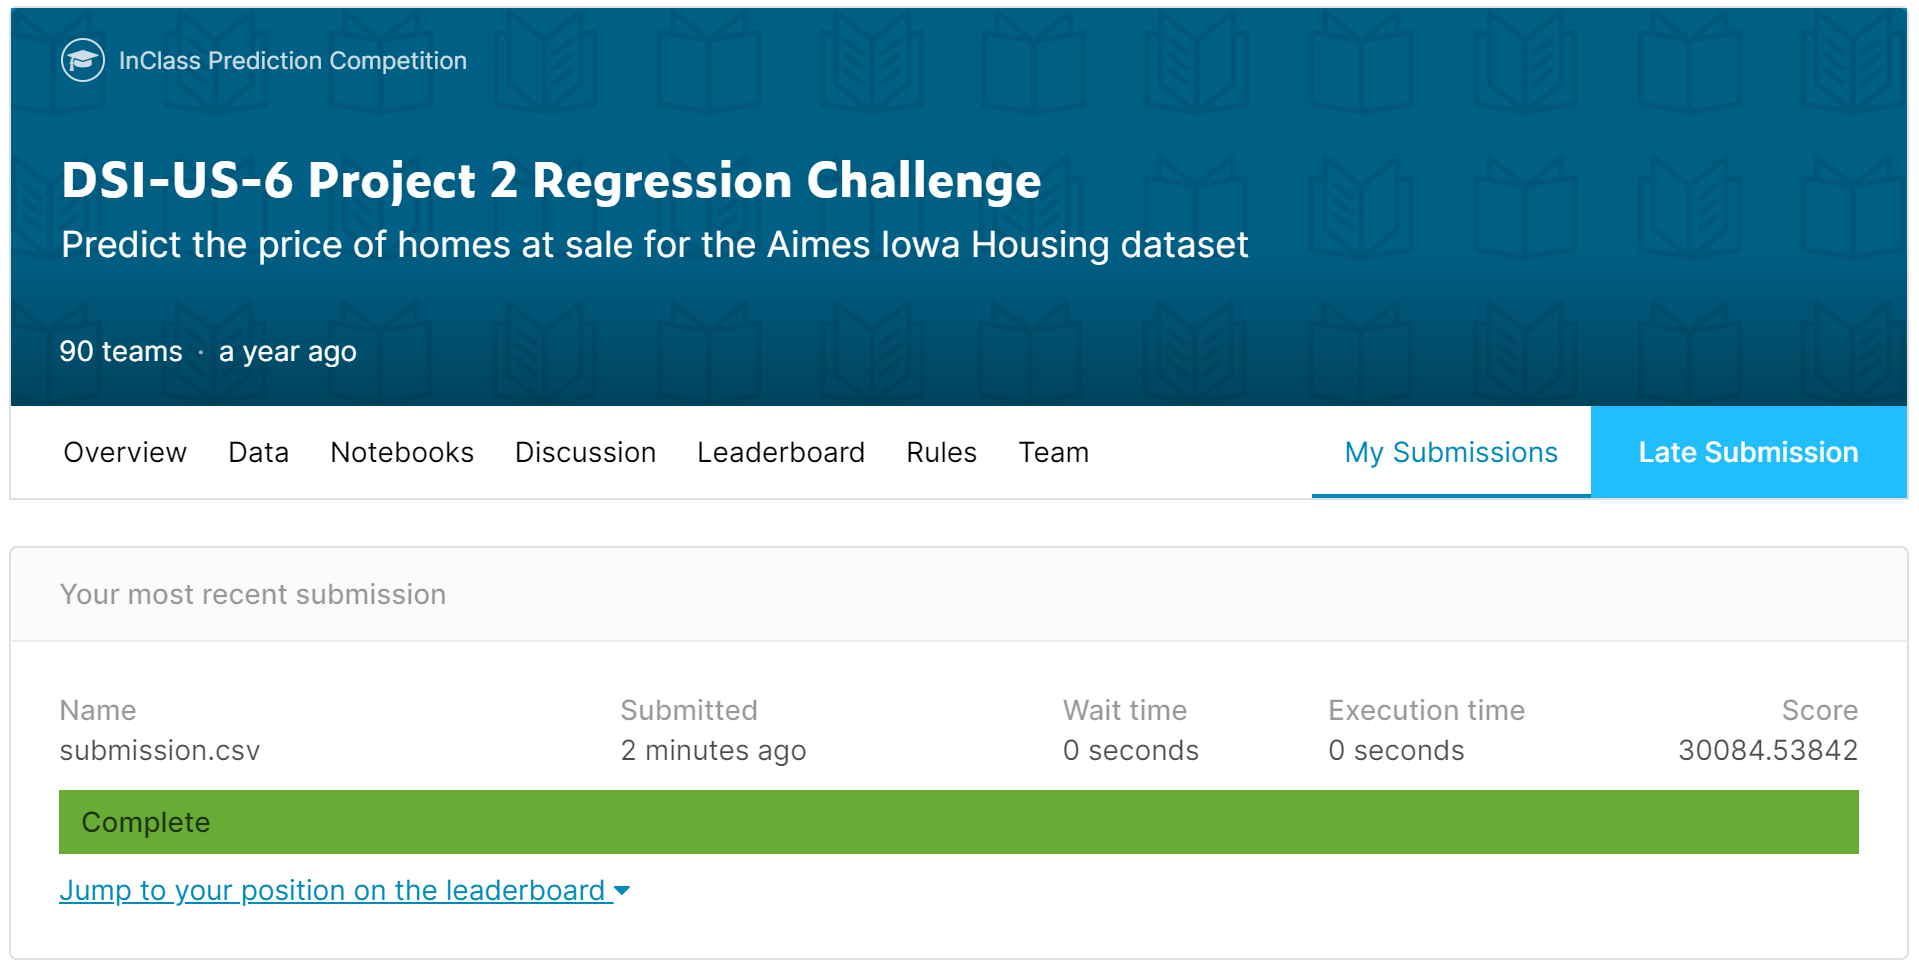

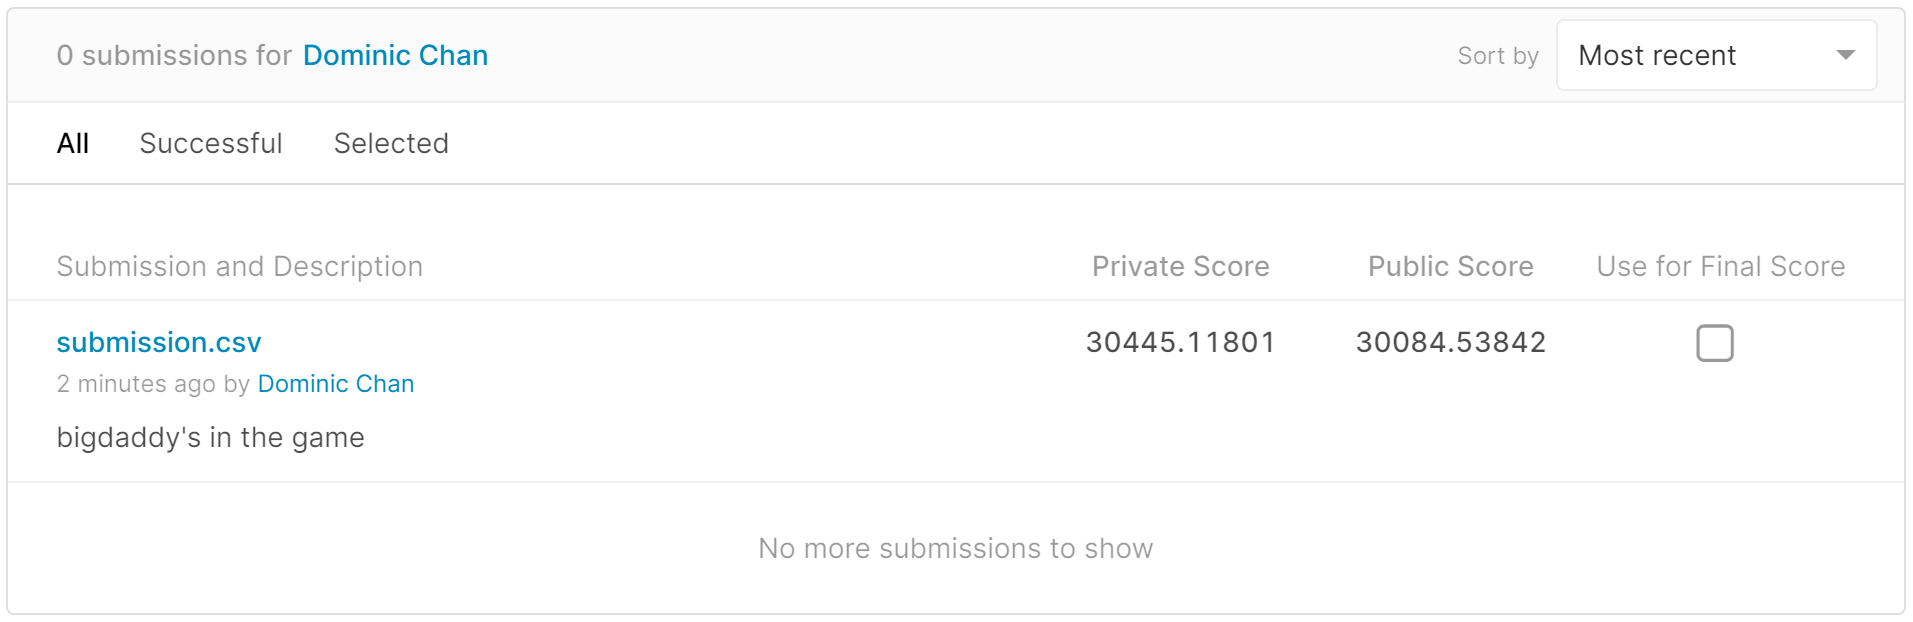

---
## 9. Final Analysis 
---

## Further Improvements
Despite having generated a relatively reliable predictive model, the following changes can still be made to better it:

- The data contained features of specific aspects of a residence, e.g. baths being half/full or in the basement, basement finishing/quality/exposure that can be engineered to haved a better picture of the effect of a good/bad basement on the property price. Hence, the house could be feature engineered with collated scorings based on the interior/exterior/(types of) rooms/kitchen/garage/etc.
- There were a number of features (e.g. basement/garage/kitchen) that did not include data on types of material used or even color &/or paint. These were traits that may have influenced the ratings used to qualify the features as to the excellent/good/fair/typical/poor scale used. More of such data pertaining to materials and paints may prove useful when aligned with the progress of time from being built or last remodelling date.
- More data on the neighbourhood facilities/amentities would be useful in improving the average sales price within poorer performing ones (e.g. clinics/hospitals/schools/shopping centers/bus stops/train stations/jails/chemical plants/etc)

